In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


df = pd.read_csv("Amstelveen.csv")


df['lbmVUDistance'] = df['lbm'] + (np.log(df['distance']) * -0.01901745)
df['lbmVUTravelTime'] = df['lbm'] + (np.log(df['travel_time']) * -0.04747753068)
df['lbmRental'] = df['lbm'] + (df['number_of_rental'] * 0.12600989)
df['lbmRoomsStudios'] = df['lbm'] + (df['number_rooms'] * 0.12600989)
df['lbmApartments'] = df['lbm'] + (df['number_apartments'] * 0.12600989)
df['lbmDistanceRoomsStudios'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (df['number_rooms'] * 0.12600989)
df['lbmDistanceApartments'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (df['number_apartments'] * 0.12600989)
df['lbmDistanceRental'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (df['number_of_rental'] * 0.12600989)
df['lbmDistanceTravel'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068)
df['lbmTravelRental'] = df['lbm'] + (np.log(df['travel_time']) * -0.04747753068) + (df['number_of_rental'] * 0.12600989)
df['lbmTravelRoomsStudios'] = df['lbm'] + (np.log(df['travel_time']) * -0.04747753068) + (df['number_rooms'] * 0.12600989)
df['lbmTravelApartments'] = df['lbm'] + (np.log(df['travel_time']) * -0.04747753068) + (df['number_apartments'] * 0.12600989)
df['lbmDistanceTravelRooms'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068) + (df['number_rooms'] * 0.12600989)
df['lbmDistanceTravelApartments'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068) + (df['number_apartments'] * 0.12600989)
df['lbmVUScore'] = df['lbm'] + (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068) + (df['number_of_rental'] * 0.12600989)  
df['VUDistanceScore'] = (np.log(df['distance']) * -0.01901745)
df['VUTravelTimeScore'] = (np.log(df['travel_time']) * -0.04747753068)
df['RoomsStudiosScore'] = (df['number_rooms'] * 0.12600989)
df['ApartmentsScore'] = (df['number_apartments'] * 0.12600989)
df['DistanceRoomsStudios'] = (np.log(df['distance']) * -0.01901745) + (df['number_rooms'] * 0.12600989)
df['DistanceApartments'] = (np.log(df['distance']) * -0.01901745) + (df['number_apartments'] * 0.12600989)
df['DistanceRental'] = (np.log(df['distance']) * -0.01901745) + (df['number_of_rental'] * 0.12600989)
df['DistanceTravel'] = (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068) + (5 * (0.04747753068 + 0.01901745))
df['TravelRental'] = (np.log(df['travel_time']) * -0.04747753068) + (df['number_of_rental'] * 0.12600989)
df['TravelRoomsStudios'] = (np.log(df['travel_time']) * -0.04747753068) + (df['number_rooms'] * 0.12600989)
df['TravelApartments'] = (np.log(df['travel_time']) * -0.04747753068) + (df['number_apartments'] * 0.12600989)
df['DistanceTravelRooms'] = (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068) + (df['number_rooms'] * 0.12600989)
df['DistanceTravelApartments'] = (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068) + (df['number_apartments'] * 0.12600989)
df['VUScore'] = (np.log(df['distance']) * -0.01901745) + (np.log(df['travel_time']) * -0.04747753068) + (df['number_of_rental'] * 0.12600989)  


df.to_csv("UpdatedAmstelveen.csv", index=False, float_format = "{:.15f}".format)



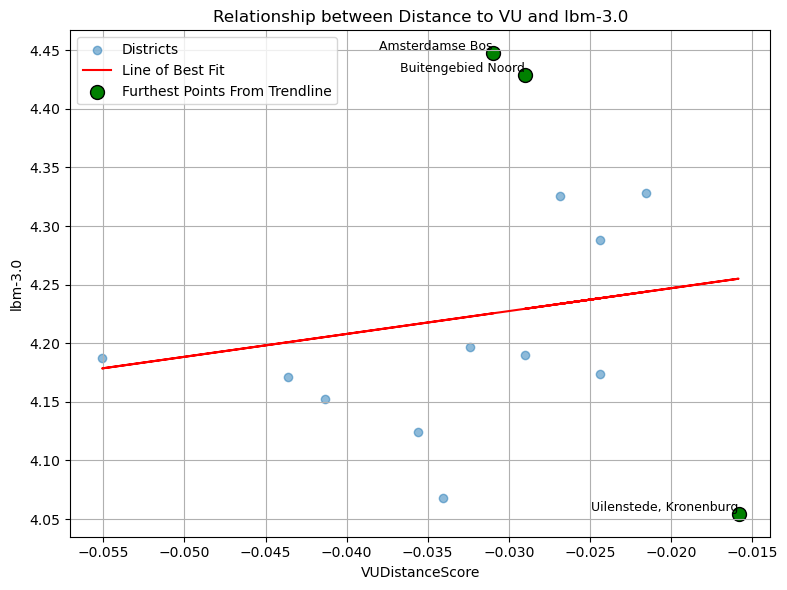

Correlation Coefficient (r_value): 0.16010981317507172
Three points furthest from the trend line:
    VUDistanceScore                 wk_naam  residuals
13        -0.030984         Amsterdamse Bos   0.221815
4         -0.015840  Uilenstede, Kronenburg   0.200514
6         -0.029022      Buitengebied Noord   0.199332


In [24]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Assuming df is already defined and contains 'VUDistanceScore', 'lbm', and 'wk_naam' columns

# Calculate linear regression parameters for VUDistanceScore and lbm
slope, intercept, r_value, p_value, std_err = linregress(df['VUDistanceScore'], df['lbm'])

# Calculate the predicted lbm values based on the regression line
df['predicted_lbm'] = intercept + slope * df['VUDistanceScore']

# Calculate the residuals (absolute differences between actual and predicted lbm)
df['residuals'] = abs(df['lbm'] - df['predicted_lbm'])

# Find the three points with the largest residuals
furthest_points = df.nlargest(3, 'residuals')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['VUDistanceScore'], df['lbm'], alpha=0.5, label='Districts')
plt.plot(df['VUDistanceScore'], df['predicted_lbm'], color='red', label='Line of Best Fit')
plt.scatter(furthest_points['VUDistanceScore'], furthest_points['lbm'], color='green', s=100, edgecolors='black', label='Furthest Points From Trendline')

# Annotate the furthest points with their wk_naam
for _, row in furthest_points.iterrows():
    plt.text(row['VUDistanceScore'], row['lbm'], row['wk_naam'], fontsize=9, ha='right', va='bottom', color='black')

plt.title('Relationship between Distance to VU and lbm-3.0')
plt.xlabel('VUDistanceScore')
plt.ylabel('lbm-3.0')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient (r_value): {r_value}")

# Print details of the three furthest points
print("Three points furthest from the trend line:")
print(furthest_points[['VUDistanceScore', 'wk_naam', 'residuals']])


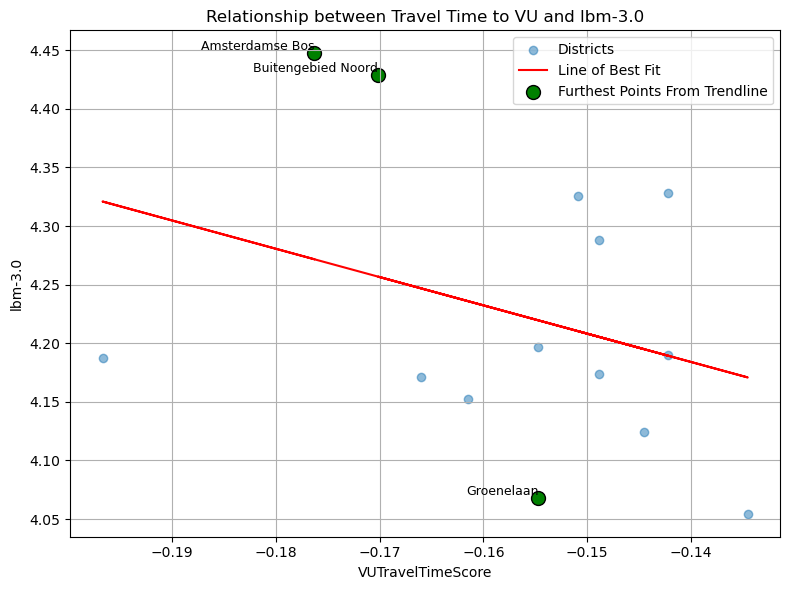

Correlation Coefficient (r_value): -0.3243887166844712
Three points furthest from the trend line:
    VUDistanceScore             wk_naam  residuals
13        -0.030984     Amsterdamse Bos   0.175630
6         -0.029022  Buitengebied Noord   0.171879
8         -0.034075          Groenelaan   0.151457


In [25]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Assuming df is already defined and contains 'VUDistanceScore', 'lbm', and 'wk_naam' columns

# Calculate linear regression parameters for VUDistanceScore and lbm
slope, intercept, r_value, p_value, std_err = linregress(df['VUTravelTimeScore'], df['lbm'])

# Calculate the predicted lbm values based on the regression line
df['predicted_lbm'] = intercept + slope * df['VUTravelTimeScore']

# Calculate the residuals (absolute differences between actual and predicted lbm)
df['residuals'] = abs(df['lbm'] - df['predicted_lbm'])

# Find the three points with the largest residuals
furthest_points = df.nlargest(3, 'residuals')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['VUTravelTimeScore'], df['lbm'], alpha=0.5, label='Districts')
plt.plot(df['VUTravelTimeScore'], df['predicted_lbm'], color='red', label='Line of Best Fit')
plt.scatter(furthest_points['VUTravelTimeScore'], furthest_points['lbm'], color='green', s=100, edgecolors='black', label='Furthest Points From Trendline')

# Annotate the furthest points with their wk_naam
for _, row in furthest_points.iterrows():
    plt.text(row['VUTravelTimeScore'], row['lbm'], row['wk_naam'], fontsize=9, ha='right', va='bottom', color='black')

plt.title('Relationship between Travel Time to VU and lbm-3.0')
plt.xlabel('VUTravelTimeScore')
plt.ylabel('lbm-3.0')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient (r_value): {r_value}")

# Print details of the three furthest points
print("Three points furthest from the trend line:")
print(furthest_points[['VUDistanceScore', 'wk_naam', 'residuals']])


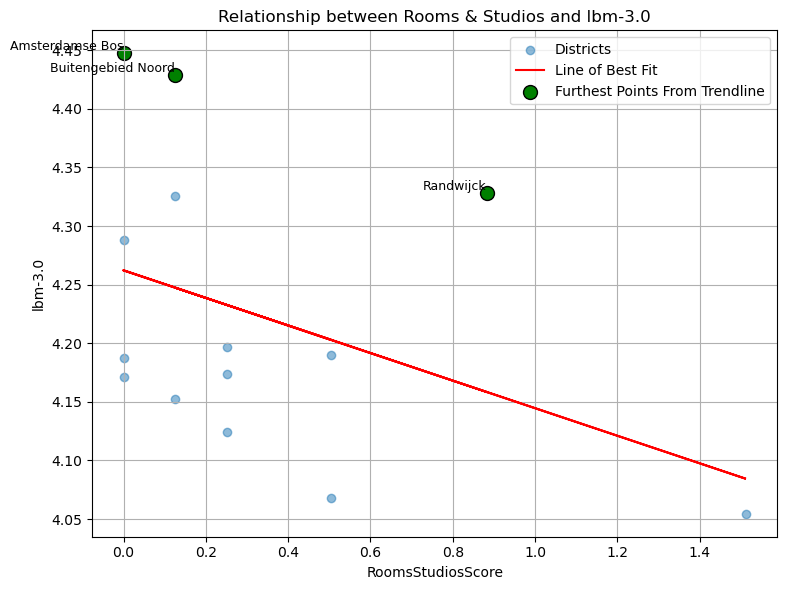

Correlation Coefficient (r_value): -0.40896516675075867
Three points furthest from the trend line:
    VUDistanceScore             wk_naam  residuals
13        -0.030984     Amsterdamse Bos   0.185133
6         -0.029022  Buitengebied Noord   0.181302
0         -0.021516           Randwijck   0.169768


In [27]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Assuming df is already defined and contains 'VUDistanceScore', 'lbm', and 'wk_naam' columns

# Calculate linear regression parameters for VUDistanceScore and lbm
slope, intercept, r_value, p_value, std_err = linregress(df['RoomsStudiosScore'], df['lbm'])

# Calculate the predicted lbm values based on the regression line
df['predicted_lbm'] = intercept + slope * df['RoomsStudiosScore']

# Calculate the residuals (absolute differences between actual and predicted lbm)
df['residuals'] = abs(df['lbm'] - df['predicted_lbm'])

# Find the three points with the largest residuals
furthest_points = df.nlargest(3, 'residuals')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['RoomsStudiosScore'], df['lbm'], alpha=0.5, label='Districts')
plt.plot(df['RoomsStudiosScore'], df['predicted_lbm'], color='red', label='Line of Best Fit')
plt.scatter(furthest_points['RoomsStudiosScore'], furthest_points['lbm'], color='green', s=100, edgecolors='black', label='Furthest Points From Trendline')

# Annotate the furthest points with their wk_naam
for _, row in furthest_points.iterrows():
    plt.text(row['RoomsStudiosScore'], row['lbm'], row['wk_naam'], fontsize=9, ha='right', va='bottom', color='black')

plt.title('Relationship between Rooms & Studios and lbm-3.0')
plt.xlabel('RoomsStudiosScore')
plt.ylabel('lbm-3.0')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient (r_value): {r_value}")

# Print details of the three furthest points
print("Three points furthest from the trend line:")
print(furthest_points[['VUDistanceScore', 'wk_naam', 'residuals']])


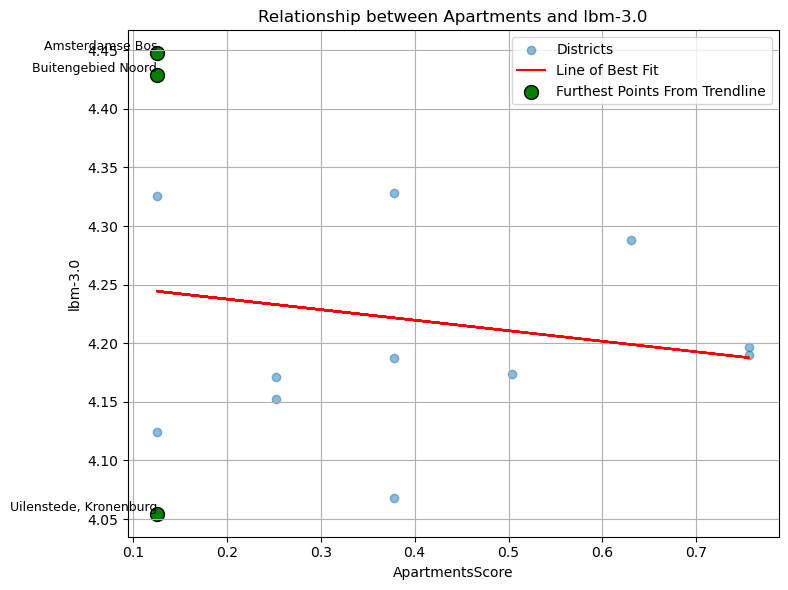

Correlation Coefficient (r_value): -0.17150091890635238
Three points furthest from the trend line:
    VUDistanceScore                 wk_naam  residuals
13        -0.030984         Amsterdamse Bos   0.203012
4         -0.015840  Uilenstede, Kronenburg   0.189767
6         -0.029022      Buitengebied Noord   0.184358


In [28]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Assuming df is already defined and contains 'VUDistanceScore', 'lbm', and 'wk_naam' columns

# Calculate linear regression parameters for VUDistanceScore and lbm
slope, intercept, r_value, p_value, std_err = linregress(df['ApartmentsScore'], df['lbm'])

# Calculate the predicted lbm values based on the regression line
df['predicted_lbm'] = intercept + slope * df['ApartmentsScore']

# Calculate the residuals (absolute differences between actual and predicted lbm)
df['residuals'] = abs(df['lbm'] - df['predicted_lbm'])

# Find the three points with the largest residuals
furthest_points = df.nlargest(3, 'residuals')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['ApartmentsScore'], df['lbm'], alpha=0.5, label='Districts')
plt.plot(df['ApartmentsScore'], df['predicted_lbm'], color='red', label='Line of Best Fit')
plt.scatter(furthest_points['ApartmentsScore'], furthest_points['lbm'], color='green', s=100, edgecolors='black', label='Furthest Points From Trendline')

# Annotate the furthest points with their wk_naam
for _, row in furthest_points.iterrows():
    plt.text(row['ApartmentsScore'], row['lbm'], row['wk_naam'], fontsize=9, ha='right', va='bottom', color='black')

plt.title('Relationship between Apartments and lbm-3.0')
plt.xlabel('ApartmentsScore')
plt.ylabel('lbm-3.0')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient (r_value): {r_value}")

# Print details of the three furthest points
print("Three points furthest from the trend line:")
print(furthest_points[['VUDistanceScore', 'wk_naam', 'residuals']])


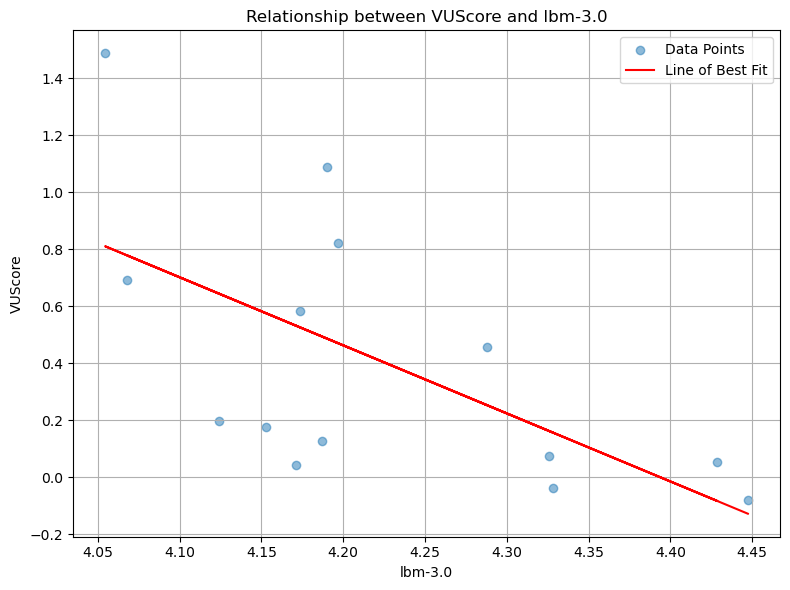

R-value: -0.6172680898382569


In [30]:
slope, intercept, r_value, p_value, std_err = linregress(df['lbm'], df['VUScore'])


plt.figure(figsize=(8, 6))  
plt.scatter(df['lbm'], df['VUScore'], alpha=0.5, label='Data Points')  
plt.plot(df['lbm'], intercept + slope * df['lbm'], color='red', label='Line of Best Fit')  
plt.title('Relationship between VUScore and lbm-3.0')
plt.xlabel('lbm-3.0')
plt.ylabel('VUScore')
plt.grid(True)
plt.legend()
plt.tight_layout()


plt.show()
print(f"R-value: {r_value}")


In [30]:
slope, intercept, r_value, p_value, std_err = linregress(df['VUDistance'], df['VUTravelTime'])


plt.figure(figsize=(8, 6))  
plt.scatter(df['VUDistance'], df['VUTravelTime'], alpha=0.5, label='Data Points')  
plt.plot(df['VUDistance'], intercept + slope * df['VUDistance'], color='red', label='Line of Best Fit')  
plt.title('Relationship between Distance to VU and Travel time to VU')
plt.xlabel('VUDistance')
plt.ylabel('VUTravelTime')
plt.grid(True)
plt.legend()
plt.tight_layout()


plt.show()
print(f"R-value: {r_value}")


KeyError: 'VUDistance'

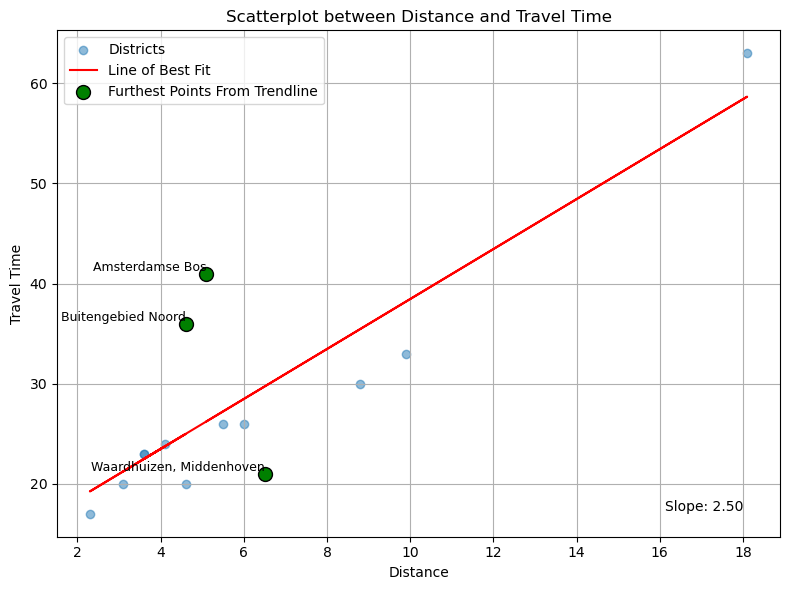

Correlation Coefficient (r_value): 0.8444166065467343
Three points furthest from the trend line:
    distance                   wk_naam  residuals
13       5.1           Amsterdamse Bos  14.782140
6        4.6        Buitengebied Noord  11.030402
9        6.5  Waardhuizen, Middenhoven   8.712995


In [32]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Assuming df is already defined and contains 'distance', 'travel_time', and 'wk_naam' columns

# Calculate linear regression parameters for distance and travel_time
slope, intercept, r_value, p_value, std_err = linregress(df['distance'], df['travel_time'])

# Calculate the predicted travel_time values based on the regression line
df['predicted_travel_time'] = intercept + slope * df['distance']

# Calculate the residuals (absolute differences between actual and predicted travel_time)
df['residuals'] = abs(df['travel_time'] - df['predicted_travel_time'])

# Find the three points with the largest residuals
furthest_points = df.nlargest(3, 'residuals')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['distance'], df['travel_time'], alpha=0.5, label='Districts')
plt.plot(df['distance'], df['predicted_travel_time'], color='red', label='Line of Best Fit')
plt.scatter(furthest_points['distance'], furthest_points['travel_time'], color='green', s=100, edgecolors='black', label='Furthest Points From Trendline')

# Annotate the furthest points with their wk_naam
for _, row in furthest_points.iterrows():
    plt.text(row['distance'], row['travel_time'], row['wk_naam'], fontsize=9, ha='right', va='bottom', color='black')

# Annotate the plot with the slope value
plt.text(0.95, 0.05, f'Slope: {slope:.2f}', transform=plt.gca().transAxes, ha='right', fontsize=10)

plt.title('Scatterplot between Distance and Travel Time')
plt.xlabel('Distance')
plt.ylabel('Travel Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient (r_value): {r_value}")

# Print details of the three furthest points
print("Three points furthest from the trend line:")
print(furthest_points[['distance', 'wk_naam', 'residuals']])


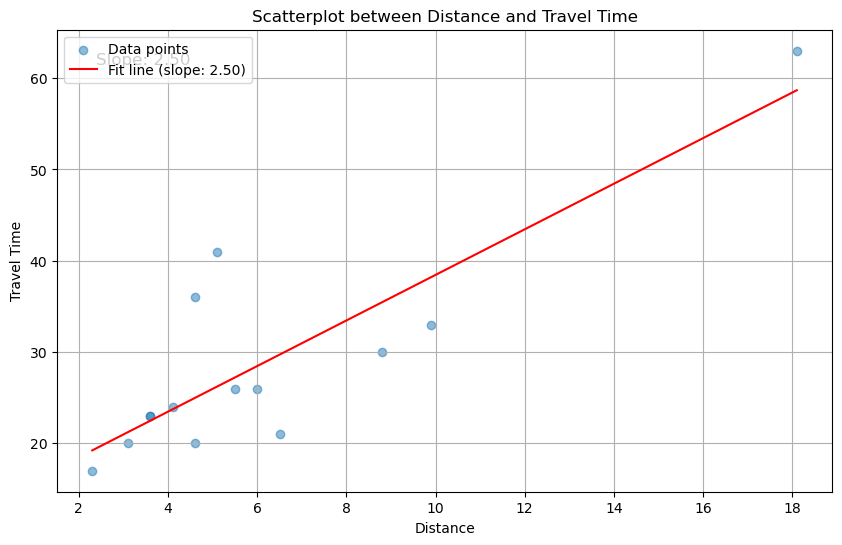

Correlation Coefficient (r_value): 0.8444166065467343


In [7]:

slope, intercept, r_value, p_value, std_err = linregress(df['distance'], df['travel_time'])


plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['travel_time'], alpha=0.5, label='Data points')


x = np.linspace(df['distance'].min(), df['distance'].max(), 100)
y = intercept + slope * x
plt.plot(x, y, color='red', label=f'Fit line (slope: {slope:.2f})')


plt.text(0.05, 0.95, f'Slope: {slope:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.title('Scatterplot between Distance and Travel Time')
plt.xlabel('Distance')
plt.ylabel('Travel Time')
plt.legend()
plt.grid(True)


plt.show()
print(f"Correlation Coefficient (r_value): {r_value}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


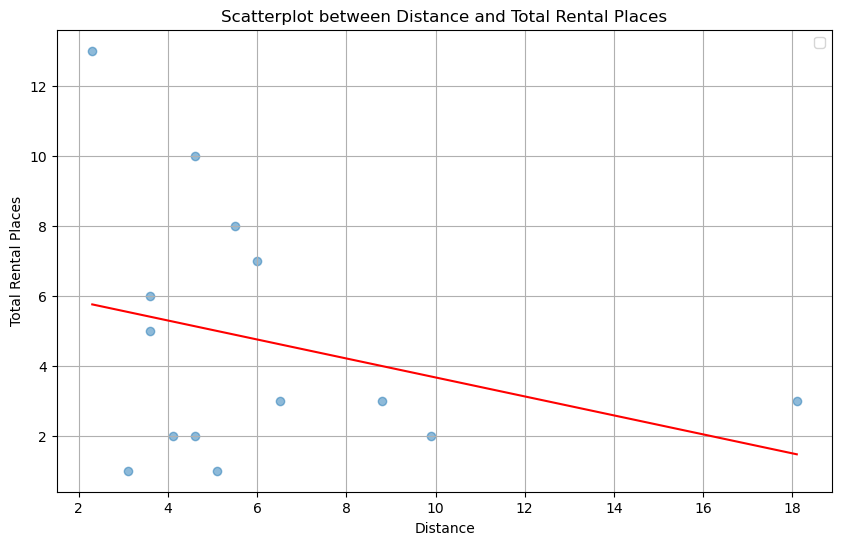

The correlation coefficient using pandas is -0.30


In [8]:

slope, intercept, r_value, p_value, std_err = linregress(df['distance'], df['number_of_rental'])


plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['number_of_rental'], alpha=0.5)


x = np.linspace(df['distance'].min(), df['distance'].max(), 100)
y = intercept + slope * x
plt.plot(x, y, color='red')



plt.title('Scatterplot between Distance and Total Rental Places')
plt.xlabel('Distance')
plt.ylabel('Total Rental Places')
plt.legend()
plt.grid(True)


plt.show()

correlation_coefficient = df['distance'].corr(df['number_of_rental'])
print(f"The correlation coefficient using pandas is {correlation_coefficient:.2f}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


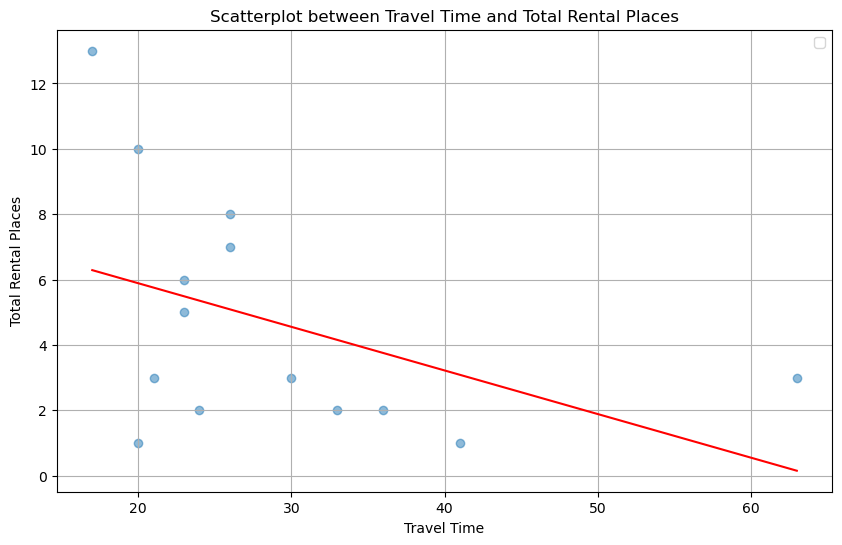

The correlation coefficient using pandas is -0.44


In [9]:

slope, intercept, r_value, p_value, std_err = linregress(df['travel_time'], df['number_of_rental'])


plt.figure(figsize=(10, 6))
plt.scatter(df['travel_time'], df['number_of_rental'], alpha=0.5)


x = np.linspace(df['travel_time'].min(), df['travel_time'].max(), 100)
y = intercept + slope * x
plt.plot(x, y, color='red')



plt.title('Scatterplot between Travel Time and Total Rental Places')
plt.xlabel('Travel Time')
plt.ylabel('Total Rental Places')
plt.legend()
plt.grid(True)


plt.show()

correlation_coefficient = df['travel_time'].corr(df['number_of_rental'])
print(f"The correlation coefficient using pandas is {correlation_coefficient:.2f}")

In [ ]:

slope, intercept, r_value, p_value, std_err = linregress(df['travel_time'], df['number_of_rental'])


plt.figure(figsize=(10, 6))
plt.scatter(df['travel_time'], df['number_of_rental'], alpha=0.5)


x = np.linspace(df['travel_time'].min(), df['travel_time'].max(), 100)
y = intercept + slope * x
plt.plot(x, y, color='red')


plt.title('Scatterplot between Travel Time and Total Rental Places')
plt.xlabel('Travel Time')
plt.ylabel('Total Rental Places')
plt.legend()
plt.grid(True)


plt.show()

correlation_coefficient = df['travel_time'].corr(df['number_of_rental'])
print(f"The correlation coefficient using pandas is {correlation_coefficient:.2f}")

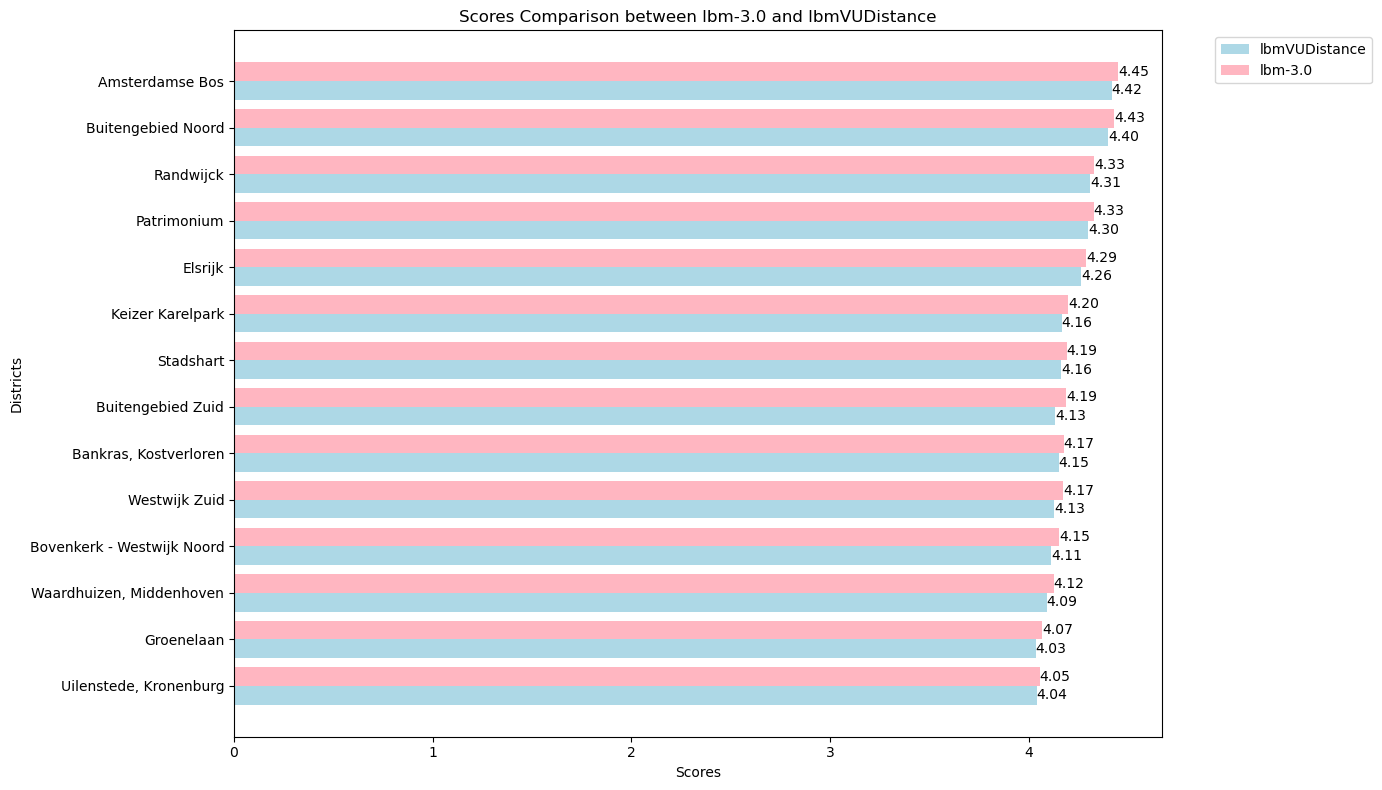

In [71]:

df = df.sort_values(by='lbm', ascending=True)


plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4


bar2 = plt.barh(index, df['lbmVUDistance'], color='lightblue', height=bar_width, label='lbmVUDistance')
bar1 = plt.barh(index + bar_width, df['lbm'], color='lightpink', height=bar_width, label='lbm-3.0')

for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm-3.0 and lbmVUDistance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()


plt.show()


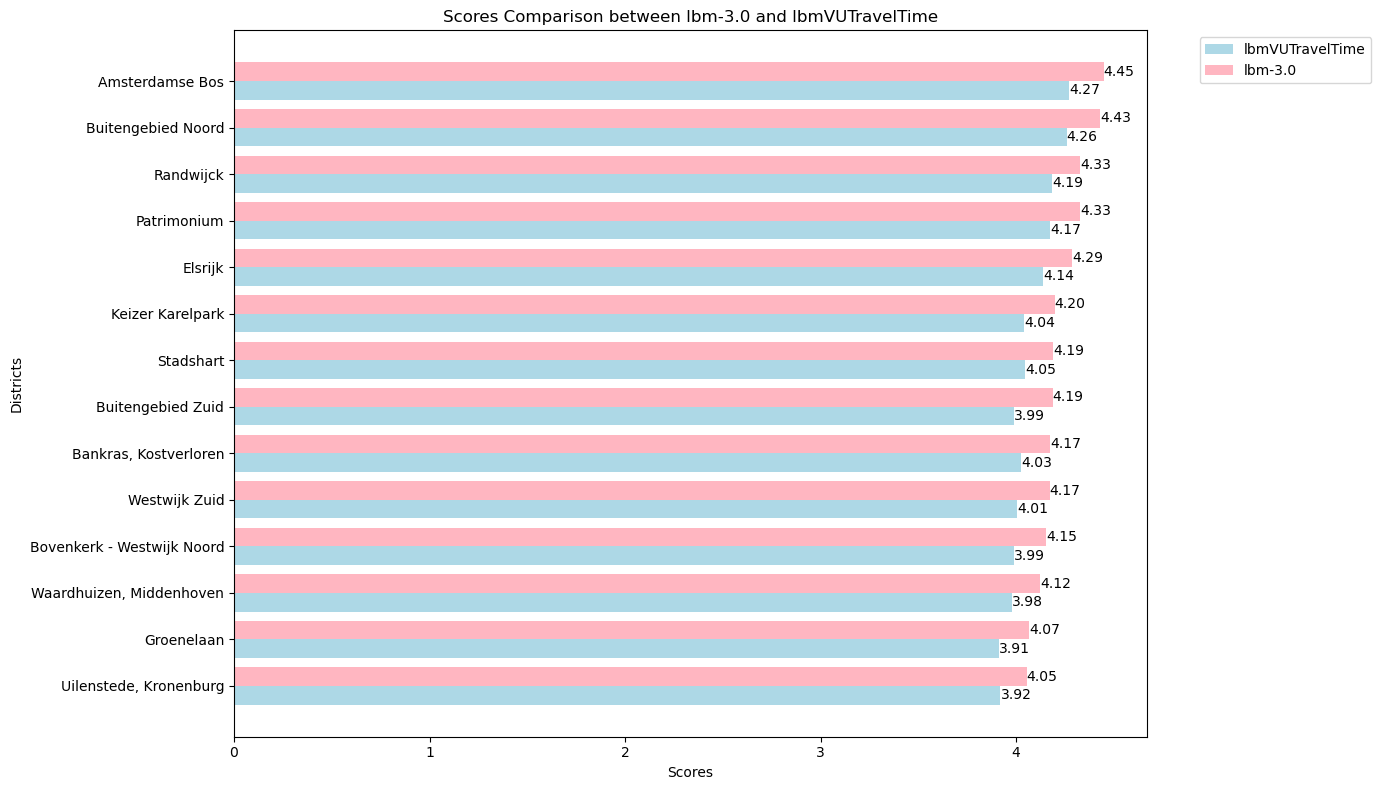

In [72]:

df = df.sort_values(by='lbm', ascending=True)


plt.figure(figsize=(14, 8))

index = np.arange(len(df))


bar_width = 0.4


bar2 = plt.barh(index, df['lbmVUTravelTime'], color='lightblue', height=bar_width, label='lbmVUTravelTime')
bar1 = plt.barh(index + bar_width, df['lbm'], color='lightpink', height=bar_width, label='lbm-3.0')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm-3.0 and lbmVUTravelTime')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()


plt.show()


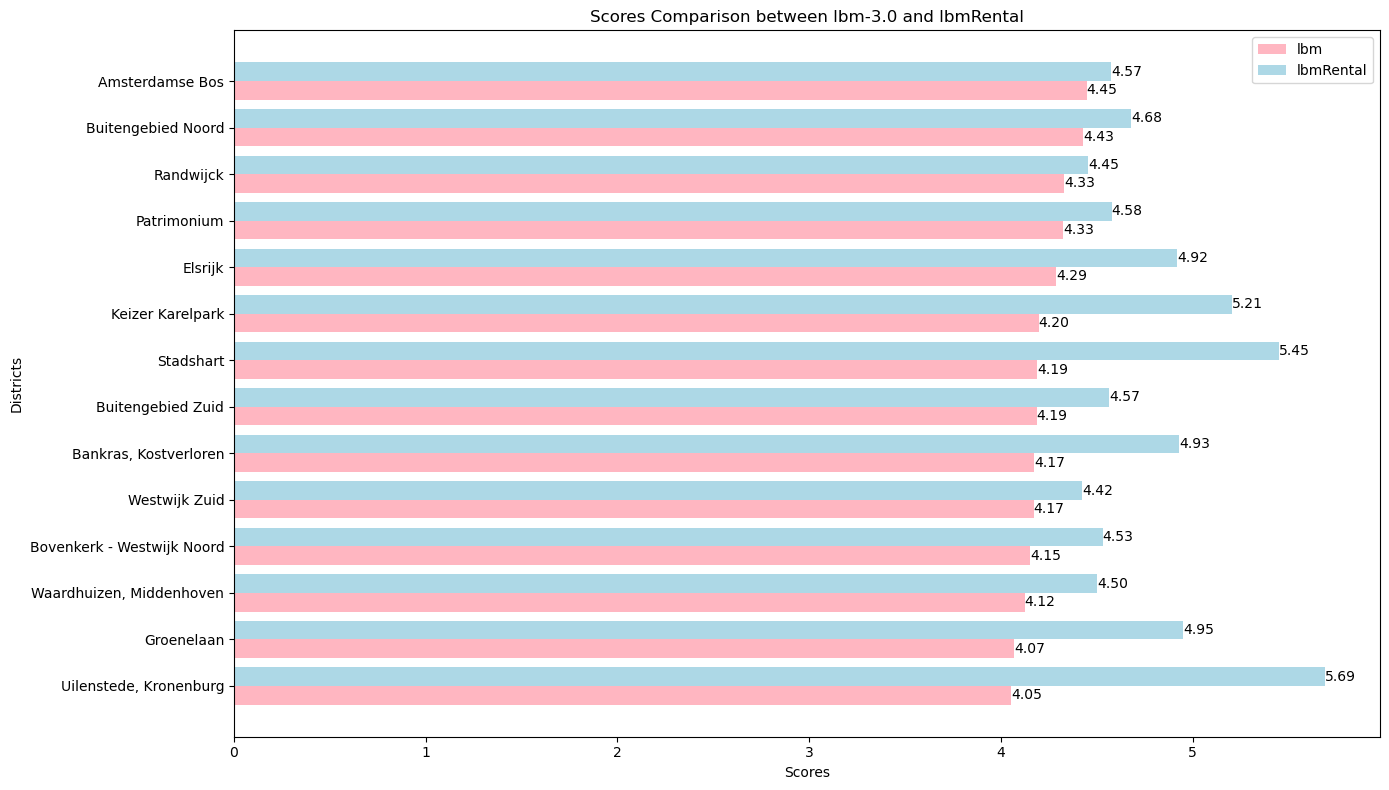

In [67]:

df = df.sort_values(by='lbm', ascending=True)


plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmRental'], color='lightblue', height=bar_width, label='lbmRental')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm-3.0 and lbmRental')
plt.legend()


plt.tight_layout()

plt.show()


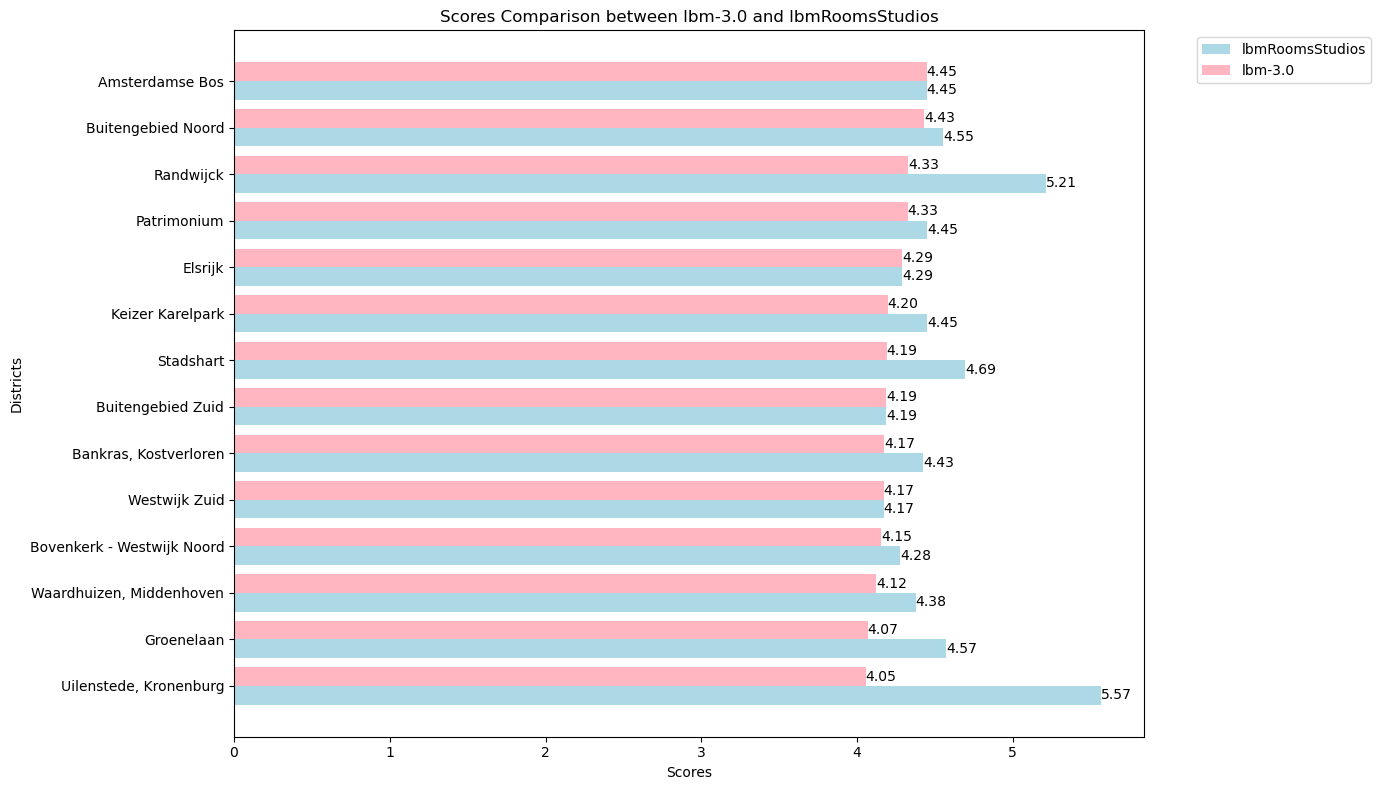

In [73]:

df = df.sort_values(by='lbm', ascending=True)


plt.figure(figsize=(14, 8))


index = np.arange(len(df))


bar_width = 0.4


bar2 = plt.barh(index, df['lbmRoomsStudios'], color='lightblue', height=bar_width, label='lbmRoomsStudios')
bar1 = plt.barh(index + bar_width, df['lbm'], color='lightpink', height=bar_width, label='lbm-3.0')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm-3.0 and lbmRoomsStudios')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()

plt.show()


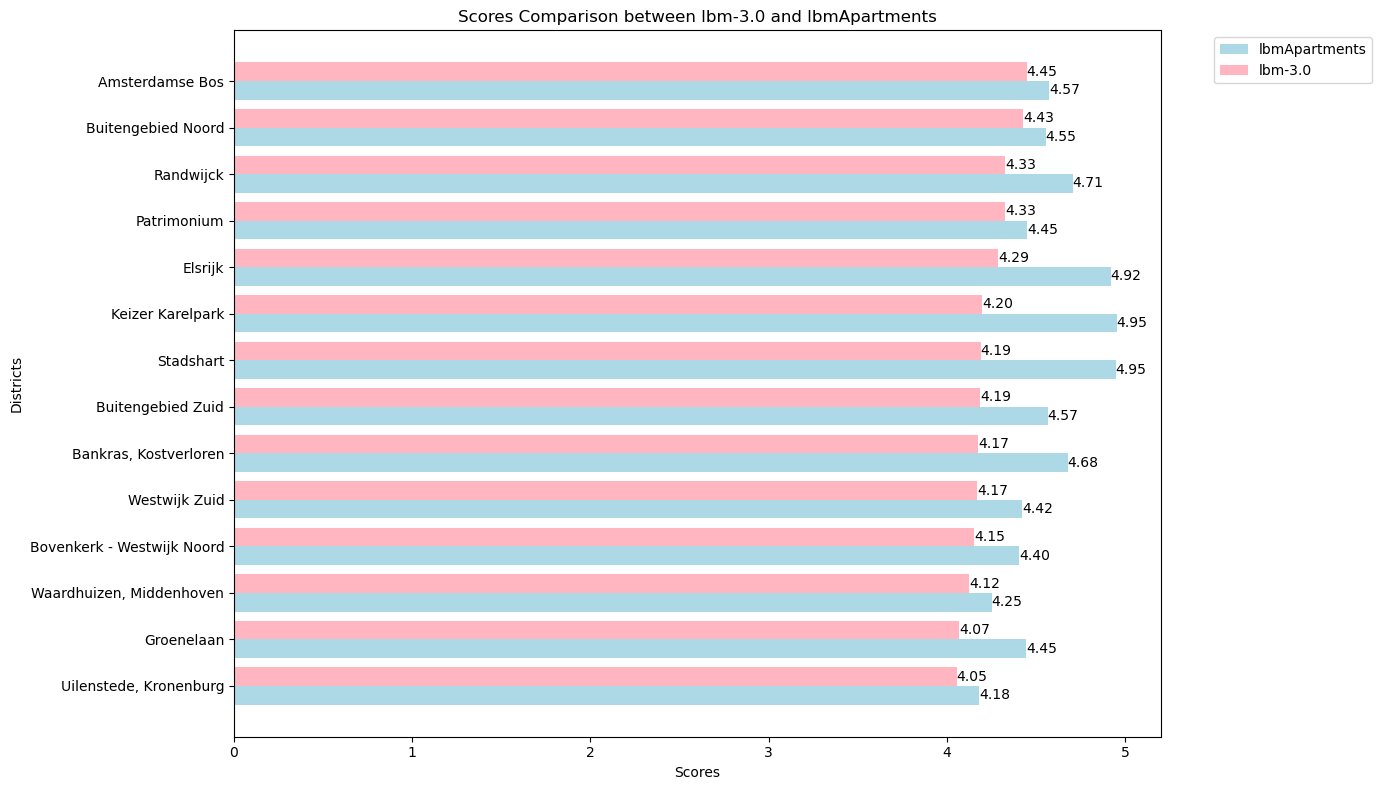

In [74]:

df = df.sort_values(by='lbm', ascending=True)


plt.figure(figsize=(14, 8))


index = np.arange(len(df))


bar_width = 0.4

bar2 = plt.barh(index, df['lbmApartments'], color='lightblue', height=bar_width, label='lbmApartments')
bar1 = plt.barh(index + bar_width, df['lbm'], color='lightpink', height=bar_width, label='lbm-3.0')

for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm-3.0 and lbmApartments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()


plt.show()


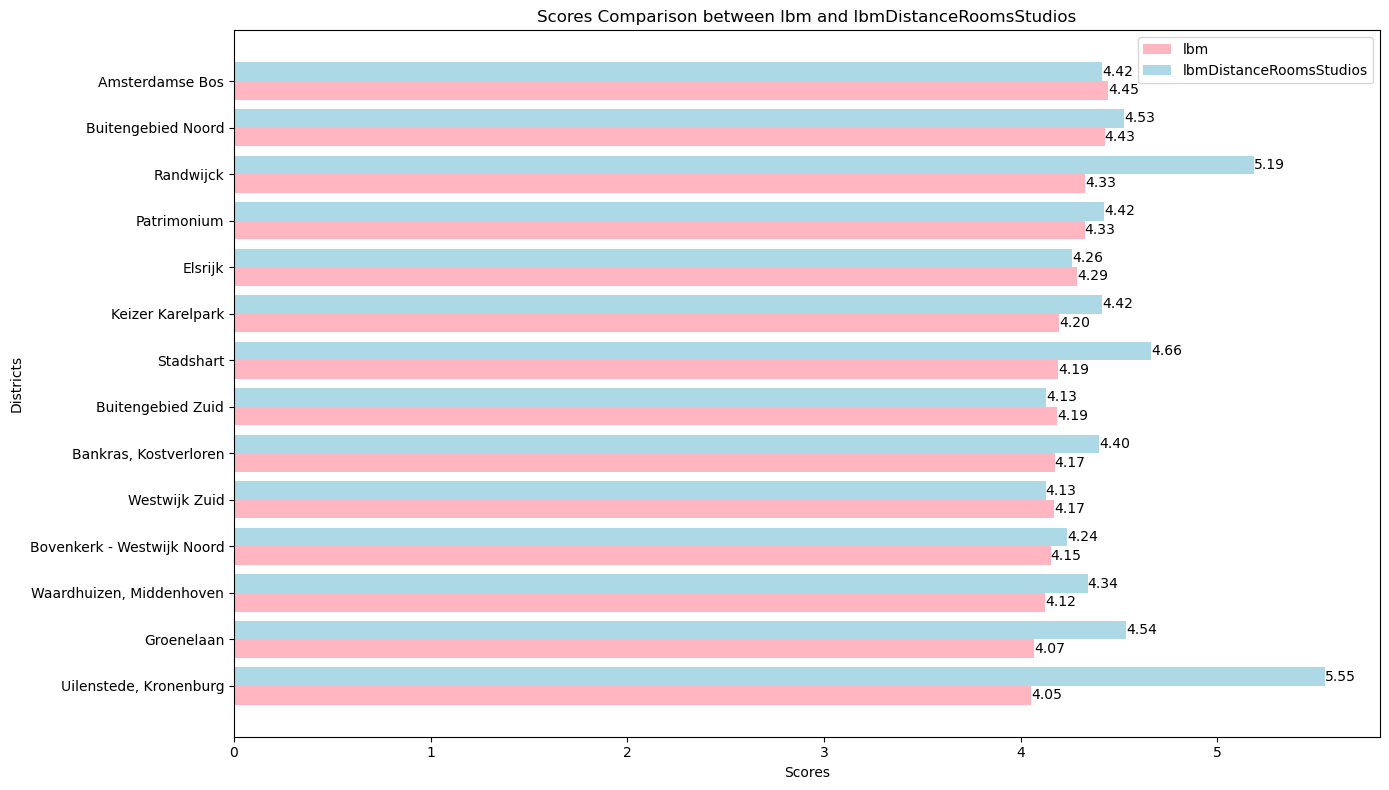

In [90]:


df = df.sort_values(by='lbm', ascending=True)


plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmDistanceRoomsStudios'], color='lightblue', height=bar_width, label='lbmDistanceRoomsStudios')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmDistanceRoomsStudios')
plt.legend()

plt.tight_layout()


plt.show()


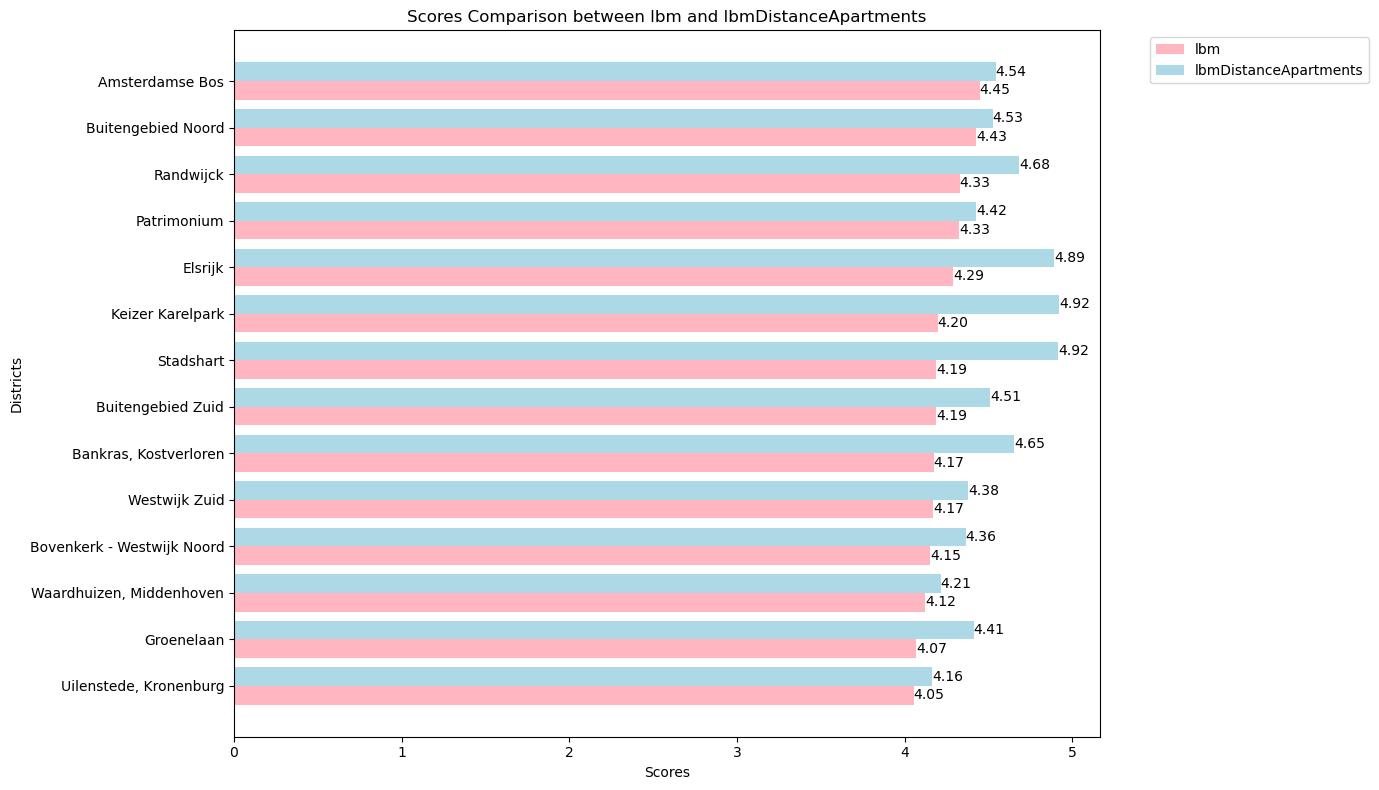

In [93]:

df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmDistanceApartments'], color='lightblue', height=bar_width, label='lbmDistanceApartments')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmDistanceApartments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


plt.show()


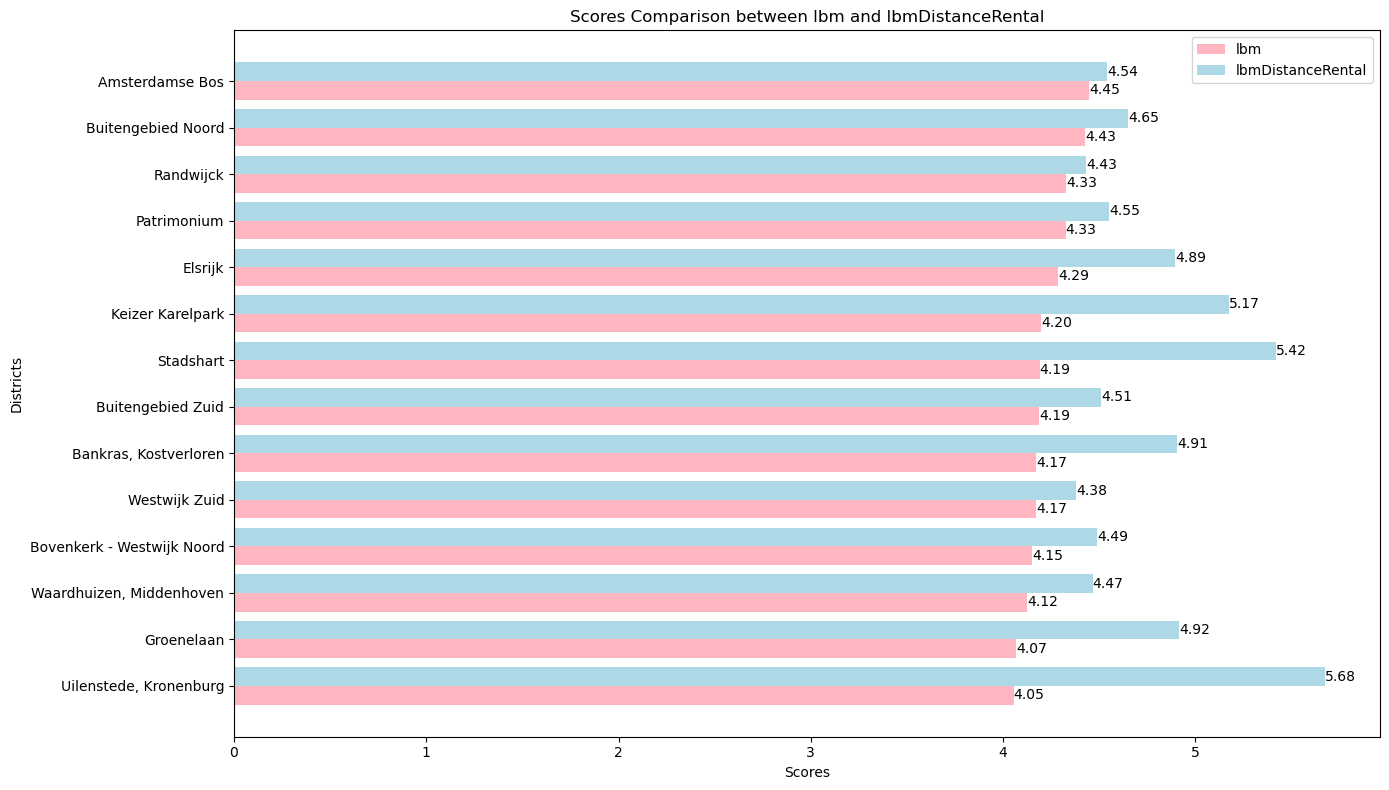

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmDistanceRental'], color='lightblue', height=bar_width, label='lbmDistanceRental')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmDistanceRental')
plt.legend()

plt.tight_layout()


plt.show()


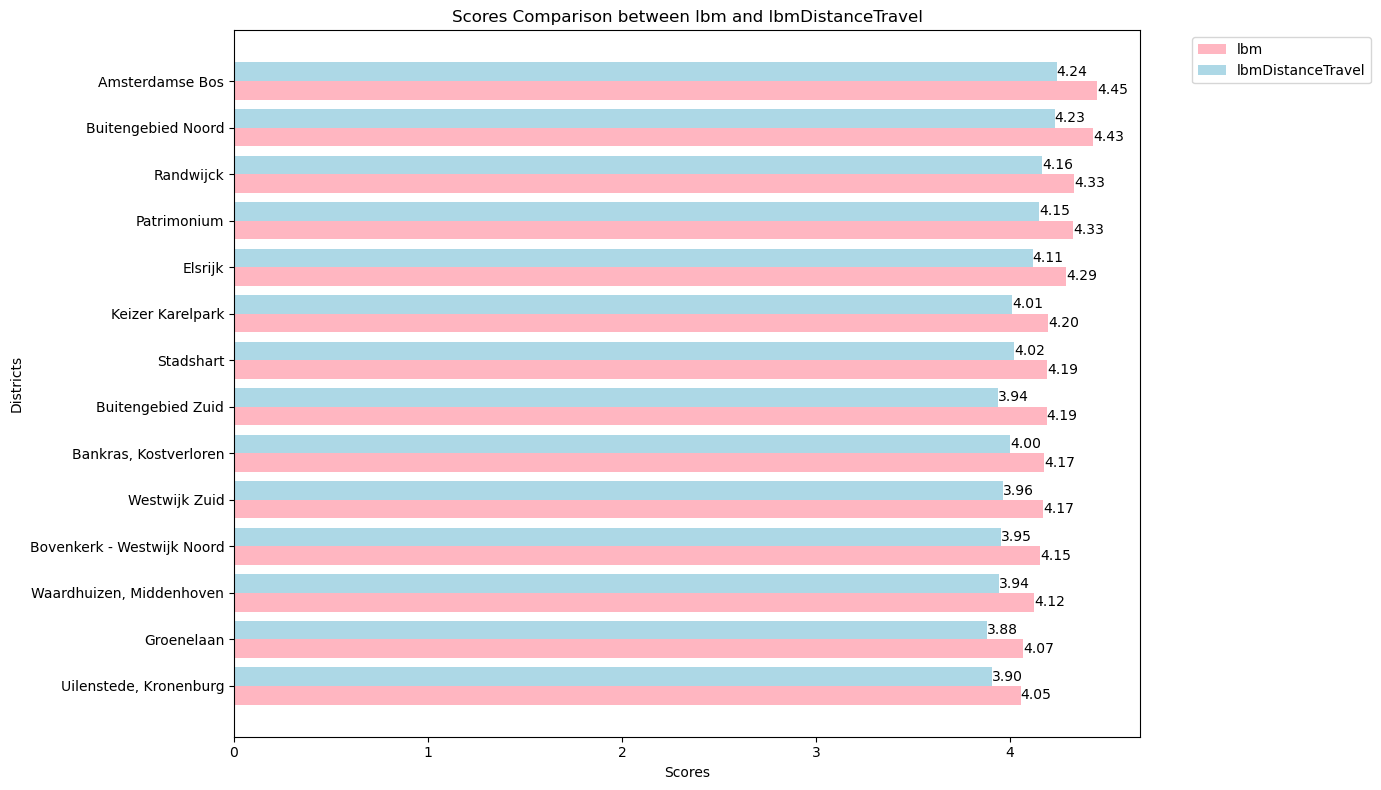

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmDistanceTravel'], color='lightblue', height=bar_width, label='lbmDistanceTravel')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmDistanceTravel')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


plt.show()


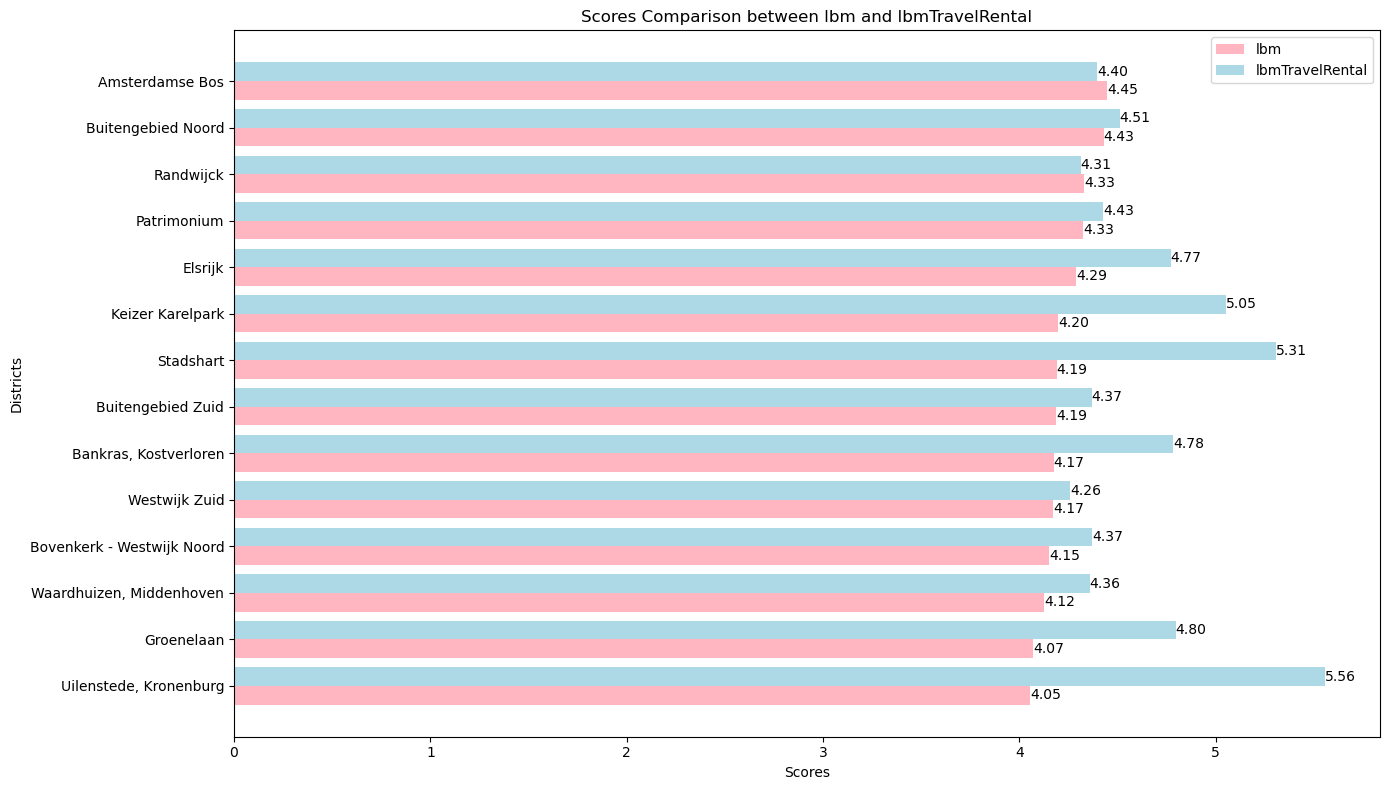

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmTravelRental'], color='lightblue', height=bar_width, label='lbmTravelRental')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmTravelRental')
plt.legend()

plt.tight_layout()


plt.show()


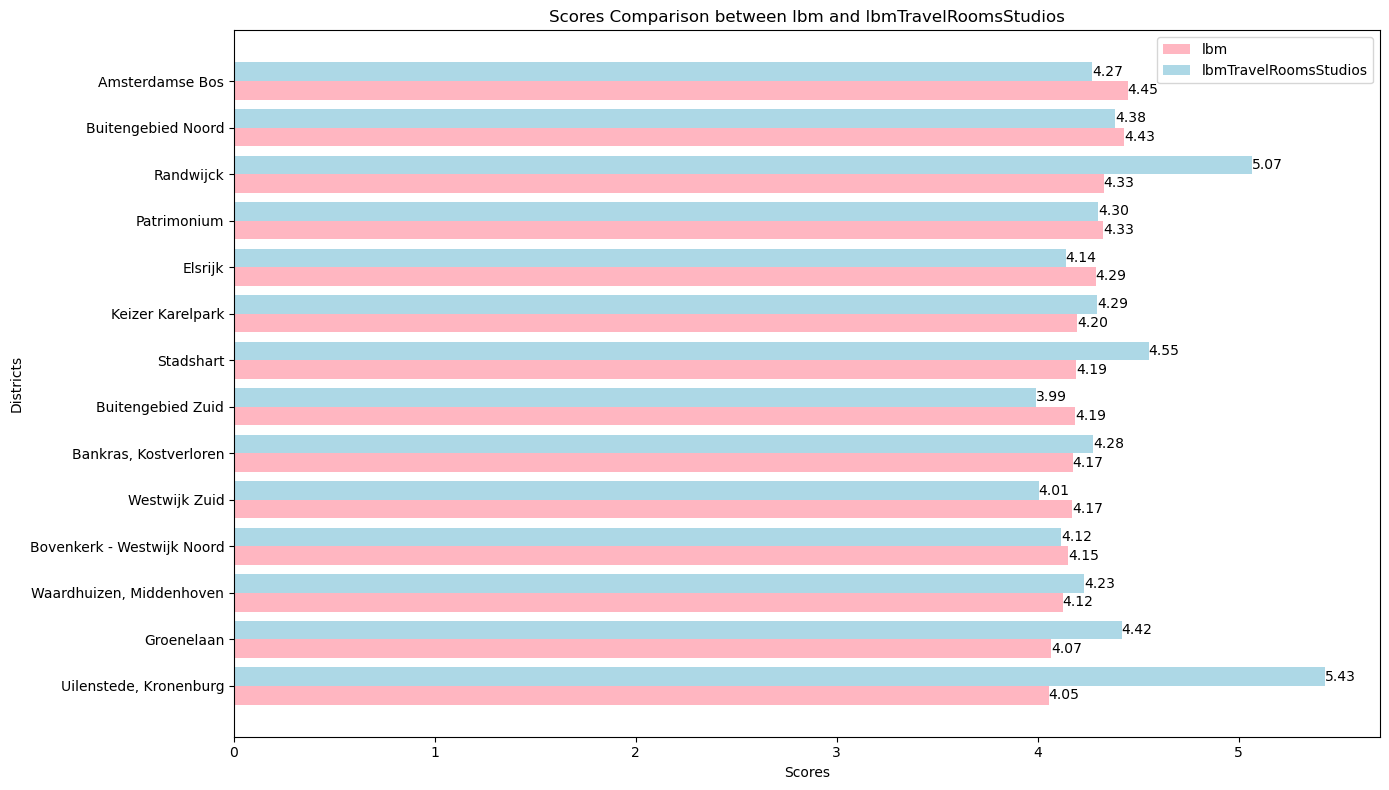

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmTravelRoomsStudios'], color='lightblue', height=bar_width, label='lbmTravelRoomsStudios')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmTravelRoomsStudios')
plt.legend()

plt.tight_layout()


plt.show()


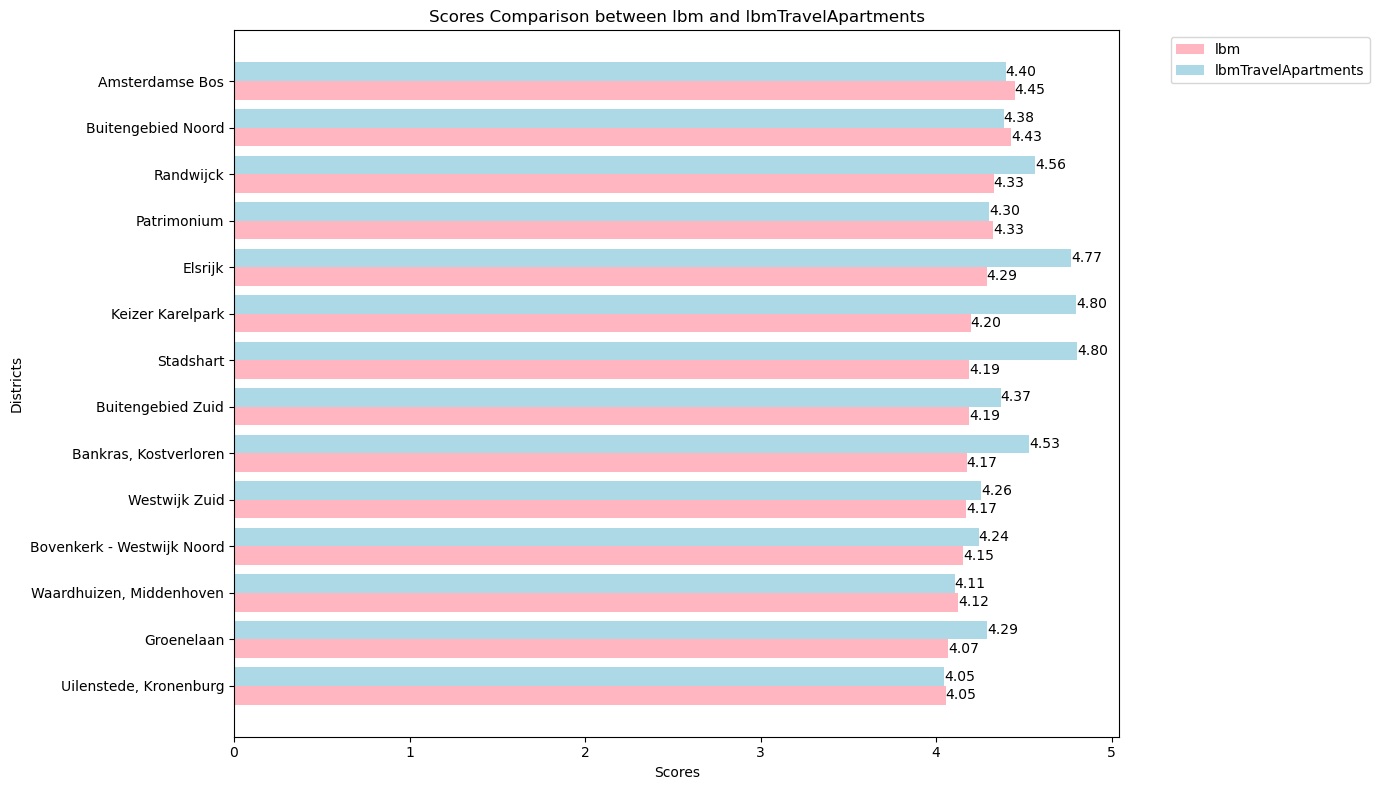

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmTravelApartments'], color='lightblue', height=bar_width, label='lbmTravelApartments')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmTravelApartments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


plt.show()


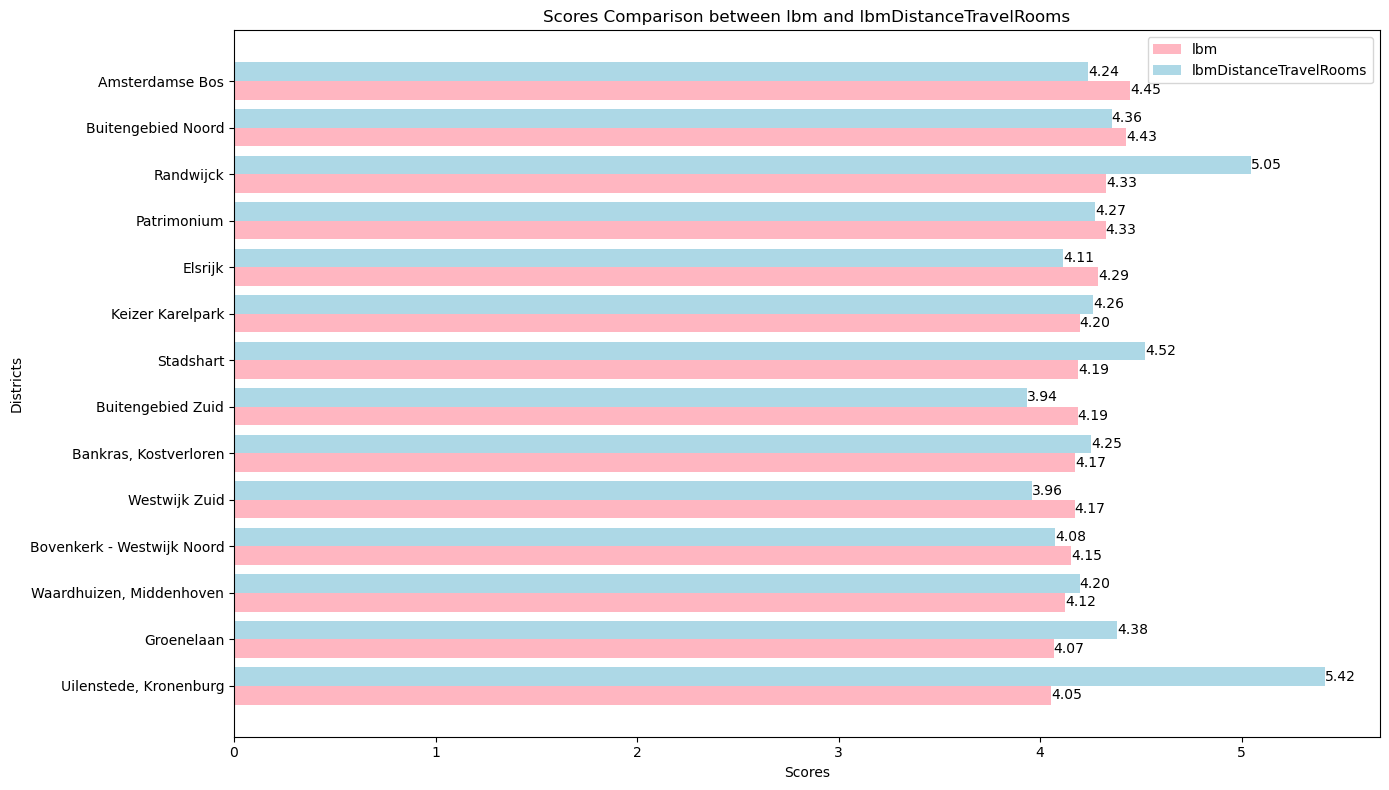

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmDistanceTravelRooms'], color='lightblue', height=bar_width, label='lbmDistanceTravelRooms')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmDistanceTravelRooms')
plt.legend()

plt.tight_layout()


plt.show()


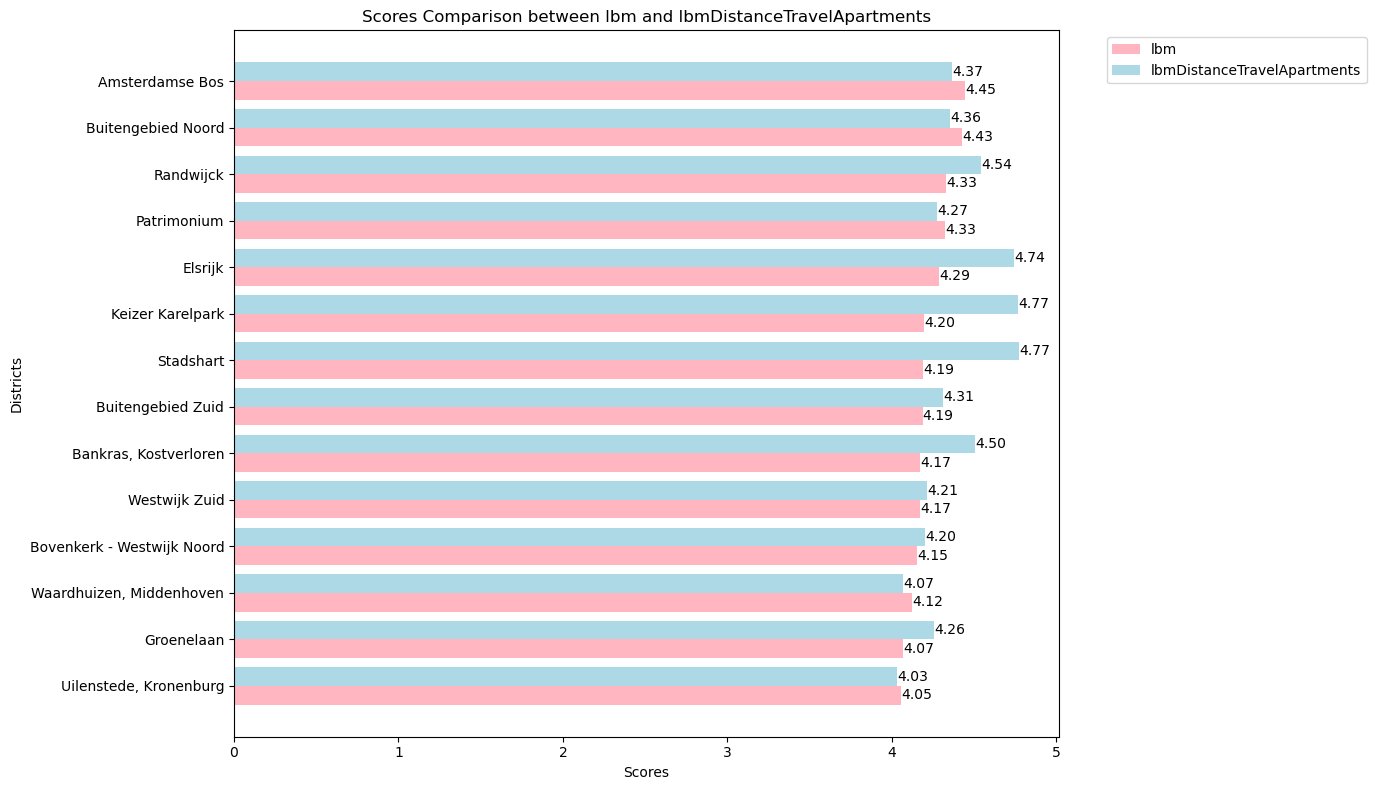

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)

plt.figure(figsize=(14, 8))


index = np.arange(len(df))

bar_width = 0.4
bar1 = plt.barh(index, df['lbm'], color='lightpink', height=bar_width, label='lbm')
bar2 = plt.barh(index + bar_width, df['lbmDistanceTravelApartments'], color='lightblue', height=bar_width, label='lbmDistanceTravelApartments')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')


plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm and lbmDistanceTravelApartments')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()


plt.show()


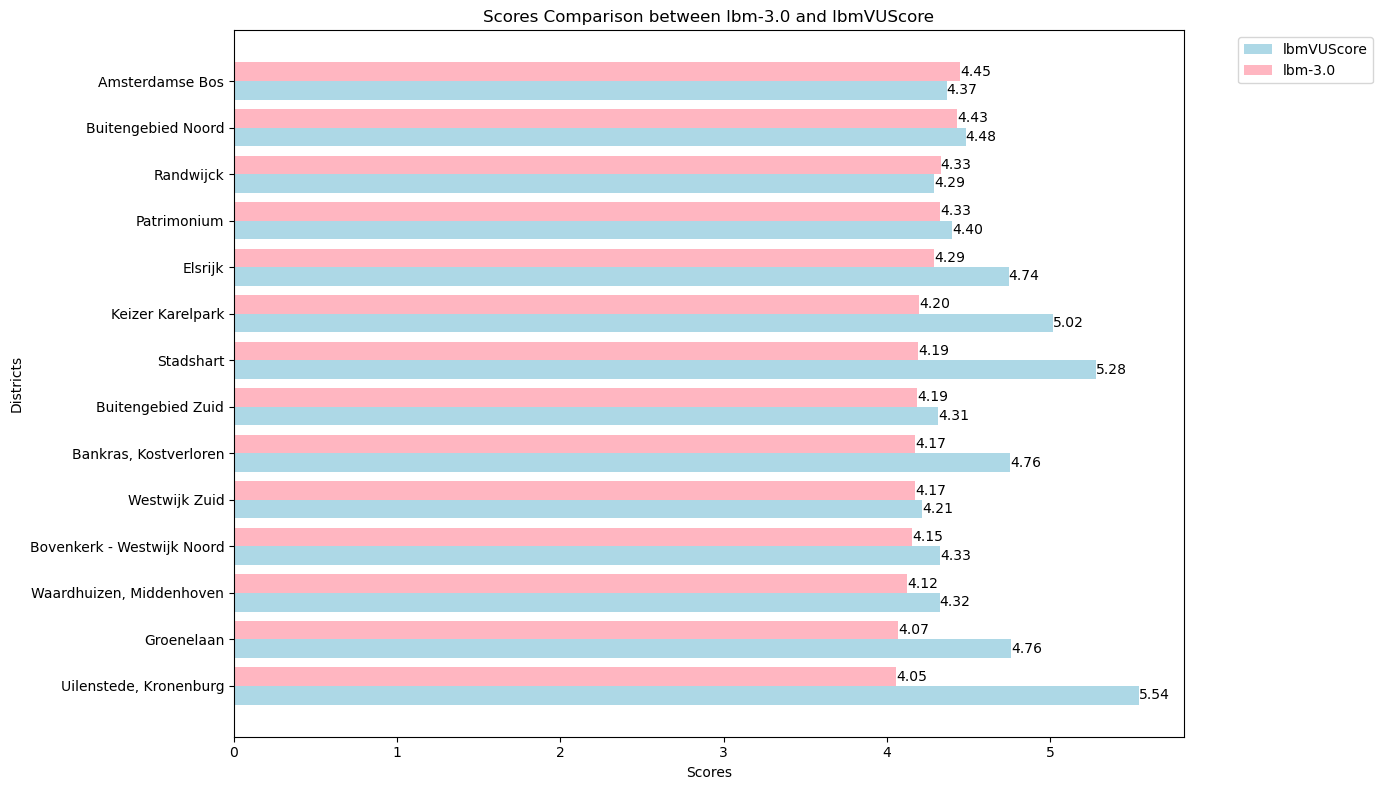

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = df.sort_values(by='lbm', ascending=True)


plt.figure(figsize=(14, 8))


index = np.arange(len(df))


bar_width = 0.4


bar2 = plt.barh(index, df['lbmVUScore'], color='lightblue', height=bar_width, label='lbmVUScore')
bar1 = plt.barh(index + bar_width, df['lbm'], color='lightpink', height=bar_width, label='lbm-3.0')


for bar in bar1:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

for bar in bar2:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2.0, f'{width:.2f}', ha='left', va='center')

plt.yticks(index + bar_width / 2, df['wk_naam'])


plt.ylabel('Districts')
plt.xlabel('Scores')
plt.title('Scores Comparison between lbm-3.0 and lbmVUScore')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()


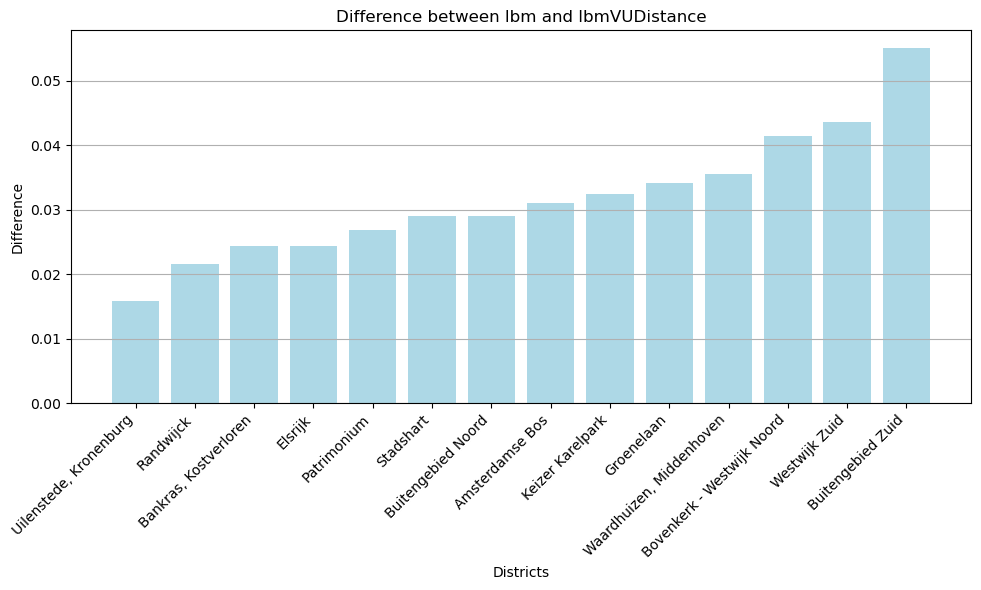

In [60]:
import pandas as pd
import matplotlib.pyplot as plt



df['lbm_difference'] = df.apply(lambda row: row['lbmVUDistance'] - row['lbm'] if row['lbm'] <= row['lbmVUDistance'] else row['lbm'] - row['lbmVUDistance'], axis=1)

df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmVUDistance')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


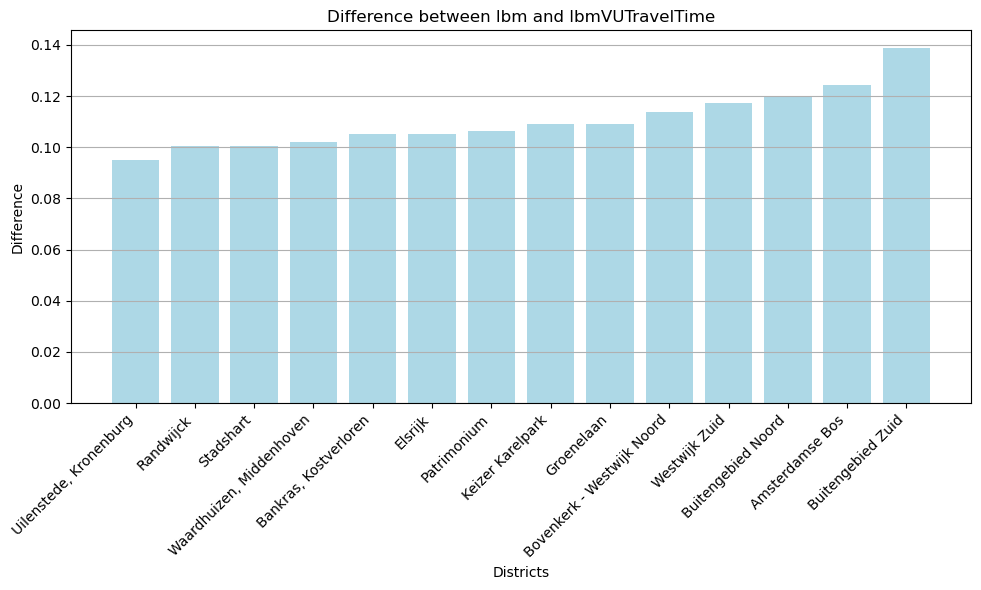

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmVUTravelTime'] - row['lbm'] if row['lbm'] <= row['lbmVUTravelTime'] else row['lbm'] - row['lbmVUTravelTime'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmVUTravelTime')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


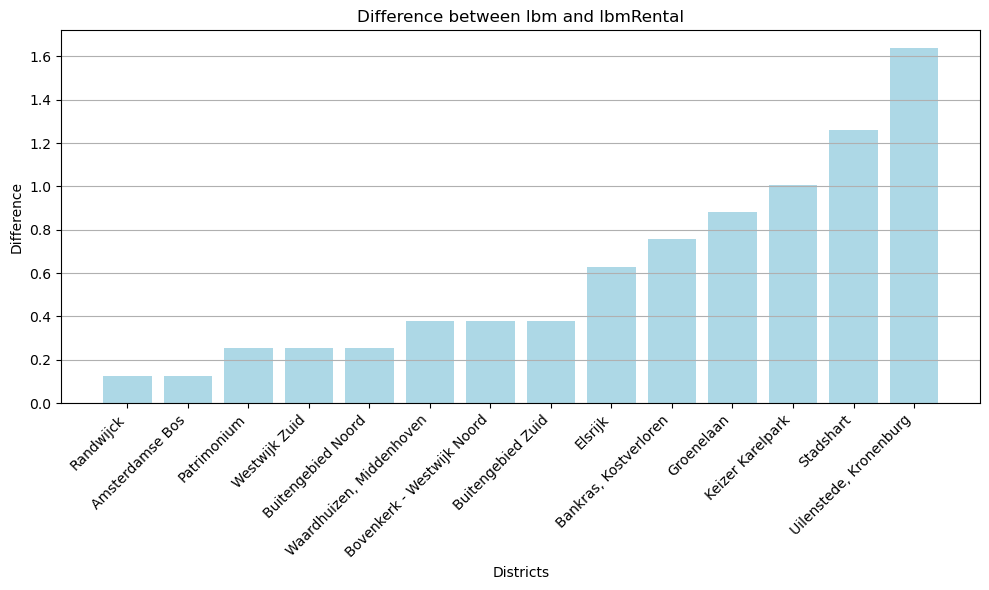

In [62]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmRental'] - row['lbm'] if row['lbm'] <= row['lbmRental'] else row['lbm'] - row['lbmRental'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmRental')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


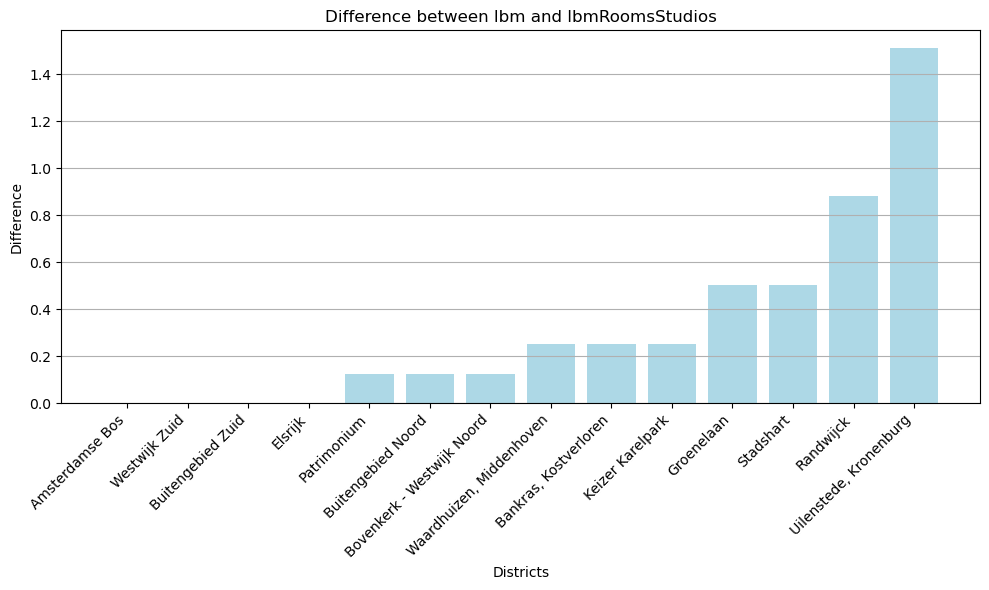

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmRoomsStudios'] - row['lbm'] if row['lbm'] <= row['lbmRoomsStudios'] else row['lbm'] - row['lbmRoomsStudios'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmRoomsStudios')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


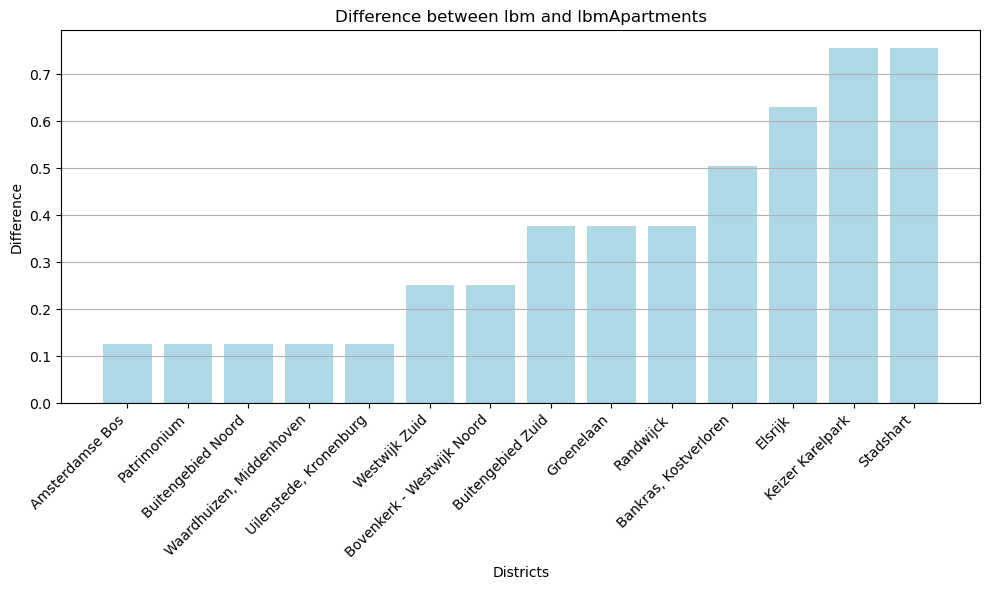

In [64]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmApartments'] - row['lbm'] if row['lbm'] <= row['lbmApartments'] else row['lbm'] - row['lbmApartments'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmApartments')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


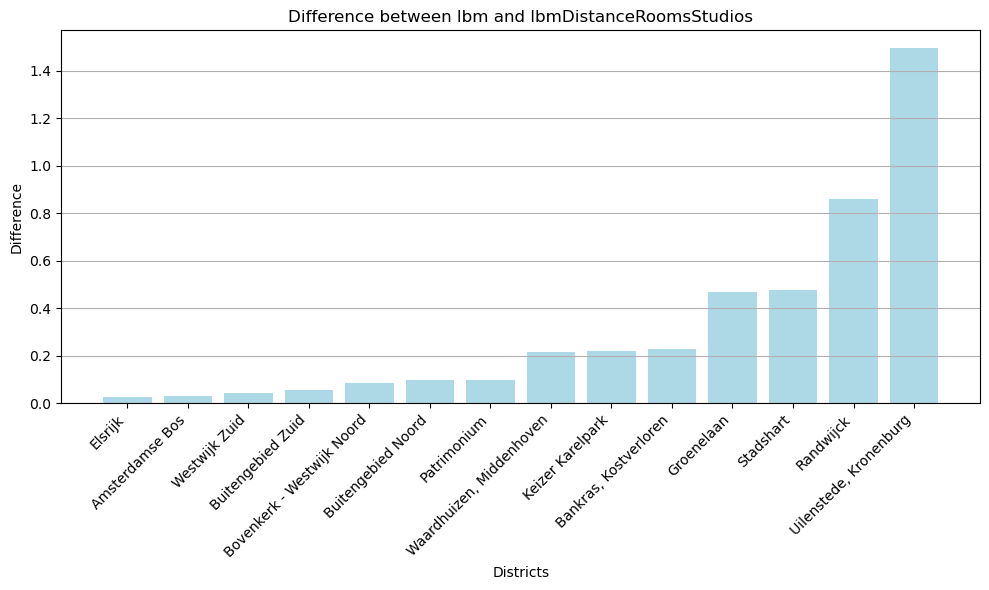

In [65]:
import pandas as pd
import matplotlib.pyplot as plt



df['lbm_difference'] = df.apply(lambda row: row['lbmDistanceRoomsStudios'] - row['lbm'] if row['lbm'] <= row['lbmDistanceRoomsStudios'] else row['lbm'] - row['lbmDistanceRoomsStudios'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmDistanceRoomsStudios')
plt.grid(axis='y')


plt.tight_layout()
plt.show()


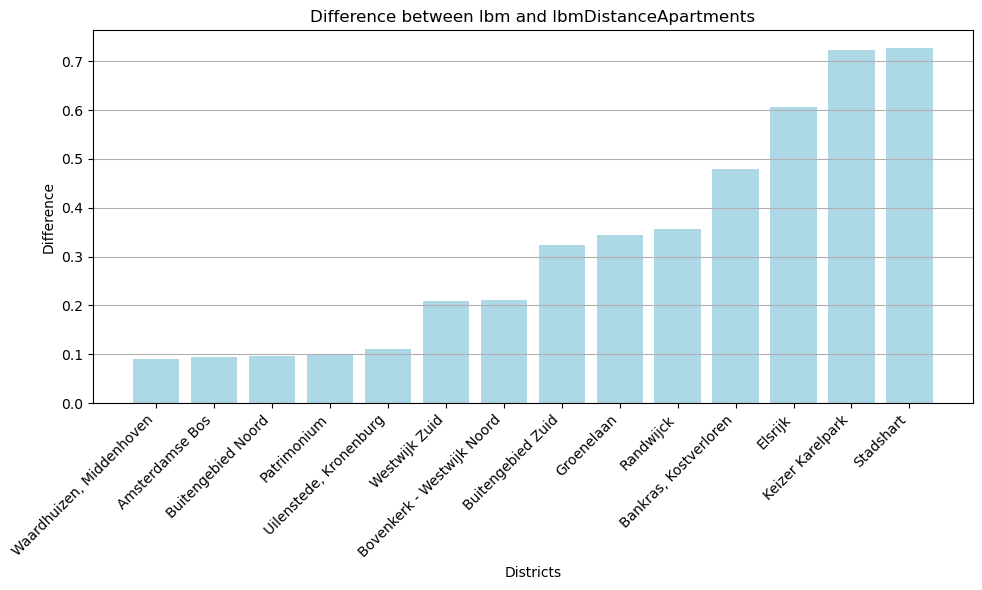

In [66]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmDistanceApartments'] - row['lbm'] if row['lbm'] <= row['lbmDistanceApartments'] else row['lbm'] - row['lbmDistanceApartments'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmDistanceApartments')
plt.grid(axis='y')


plt.tight_layout()
plt.show()


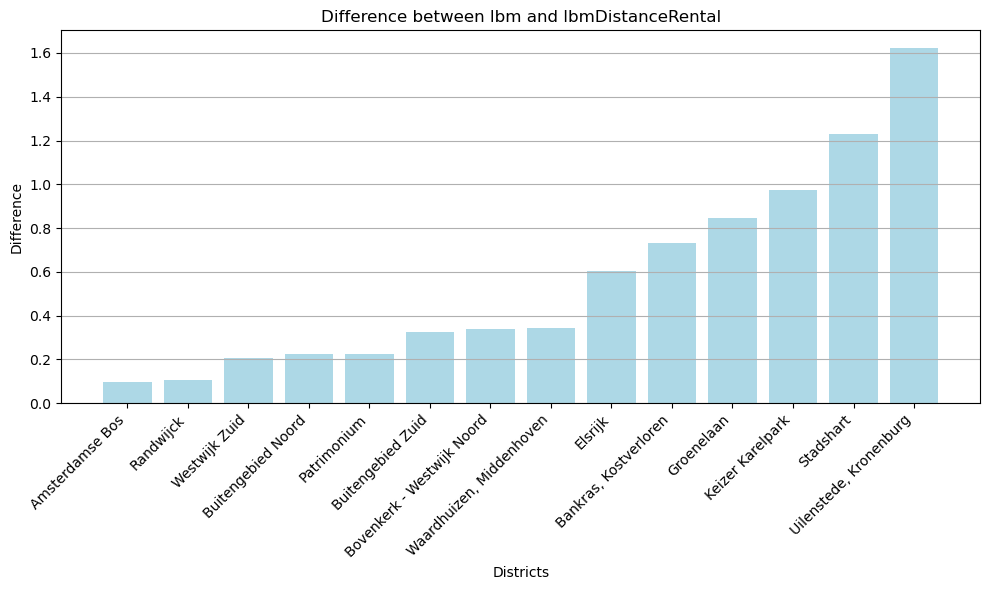

In [67]:
import pandas as pd
import matplotlib.pyplot as plt



df['lbm_difference'] = df.apply(lambda row: row['lbmDistanceRental'] - row['lbm'] if row['lbm'] <= row['lbmDistanceRental'] else row['lbm'] - row['lbmDistanceRental'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmDistanceRental')
plt.grid(axis='y')


plt.tight_layout()
plt.show()


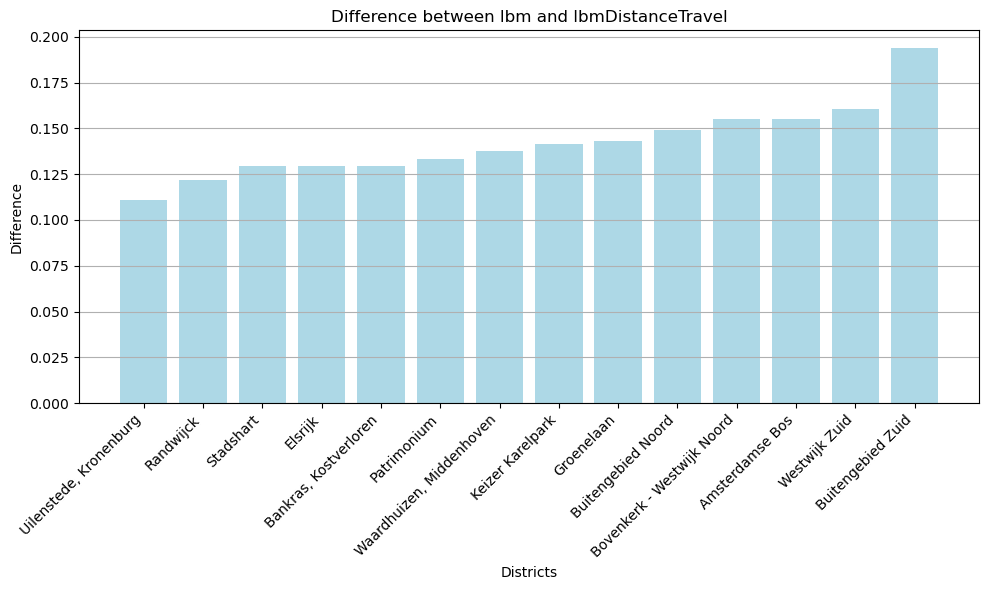

In [68]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmDistanceTravel'] - row['lbm'] if row['lbm'] <= row['lbmDistanceTravel'] else row['lbm'] - row['lbmDistanceTravel'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmDistanceTravel')
plt.grid(axis='y')


plt.tight_layout()
plt.show()


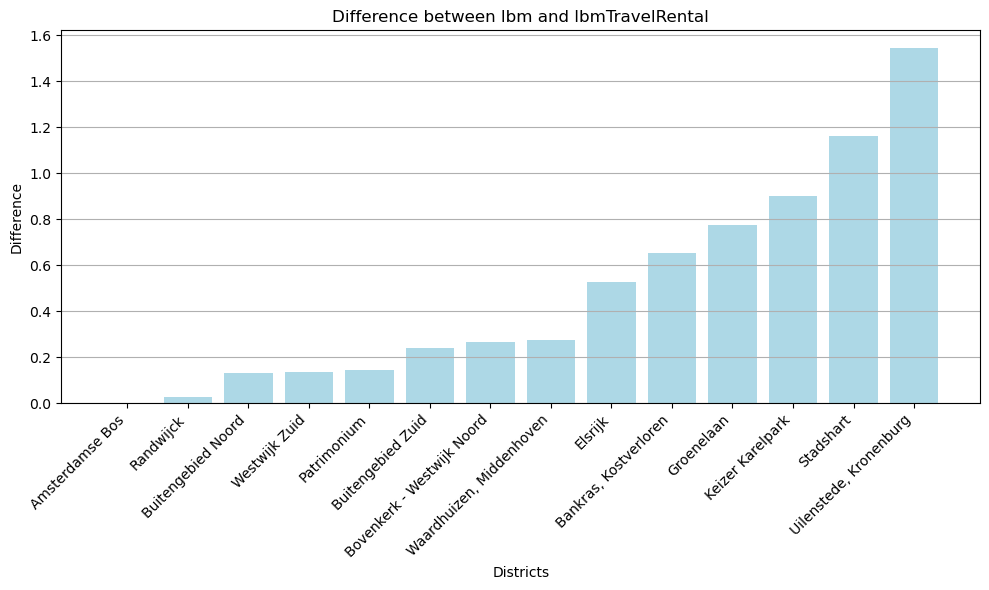

In [69]:
import pandas as pd
import matplotlib.pyplot as plt



df['lbm_difference'] = df.apply(lambda row: row['lbmTravelRental'] - row['lbm'] if row['lbm'] <= row['lbmTravelRental'] else row['lbm'] - row['lbmTravelRental'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmTravelRental')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


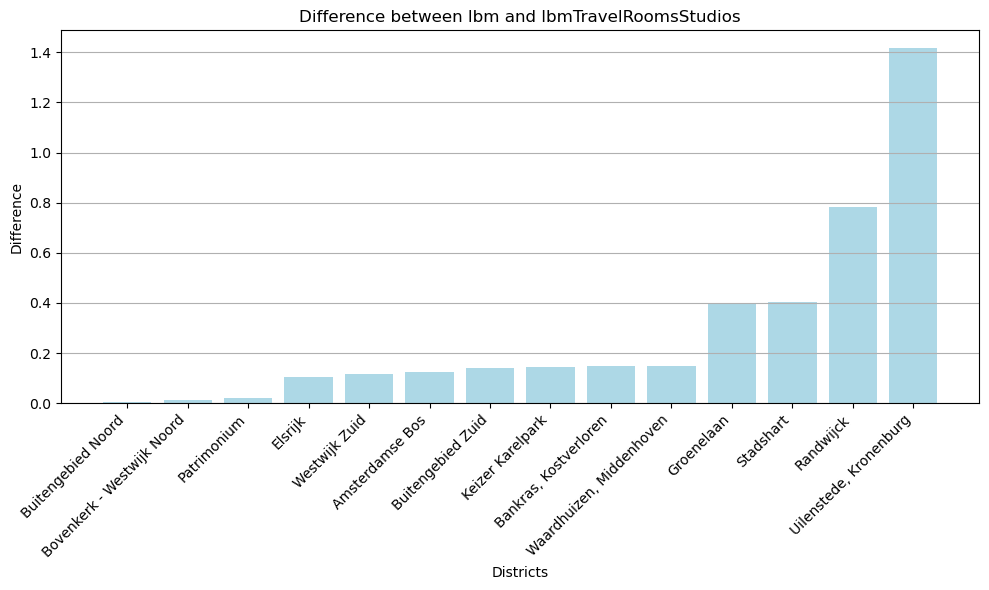

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmTravelRoomsStudios'] - row['lbm'] if row['lbm'] <= row['lbmTravelRoomsStudios'] else row['lbm'] - row['lbmTravelRoomsStudios'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmTravelRoomsStudios')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


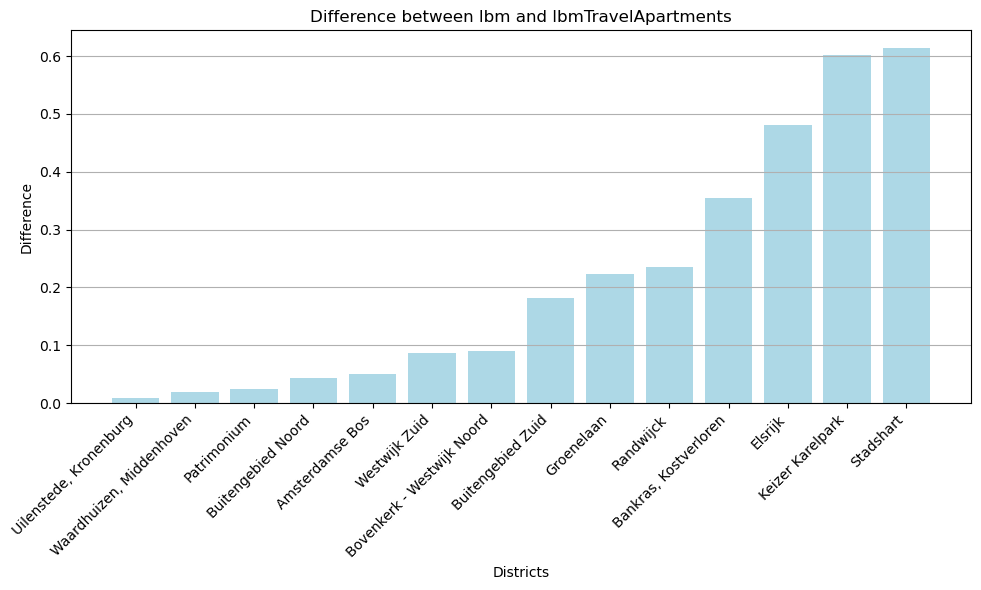

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmTravelApartments'] - row['lbm'] if row['lbm'] <= row['lbmTravelApartments'] else row['lbm'] - row['lbmTravelApartments'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmTravelApartments')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


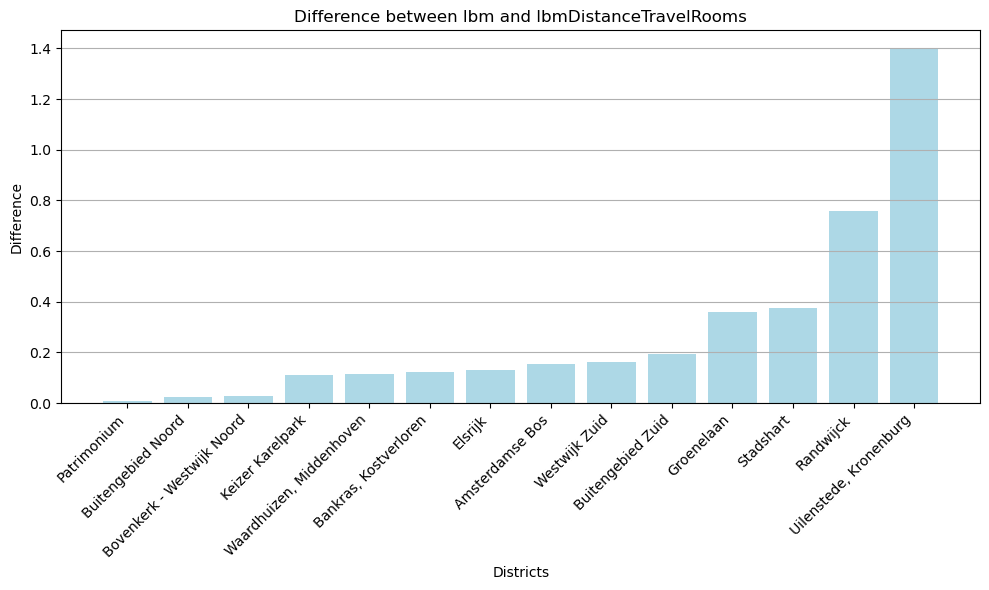

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmDistanceTravelRooms'] - row['lbm'] if row['lbm'] <= row['lbmDistanceTravelRooms'] else row['lbm'] - row['lbmDistanceTravelRooms'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmDistanceTravelRooms')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


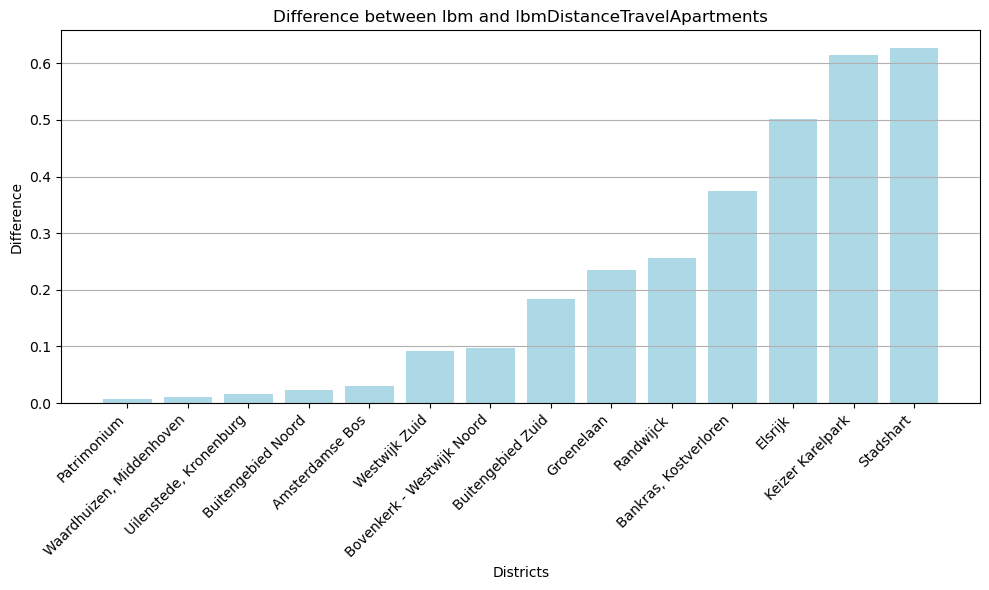

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmDistanceTravelApartments'] - row['lbm'] if row['lbm'] <= row['lbmDistanceTravelApartments'] else row['lbm'] - row['lbmDistanceTravelApartments'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmDistanceTravelApartments')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


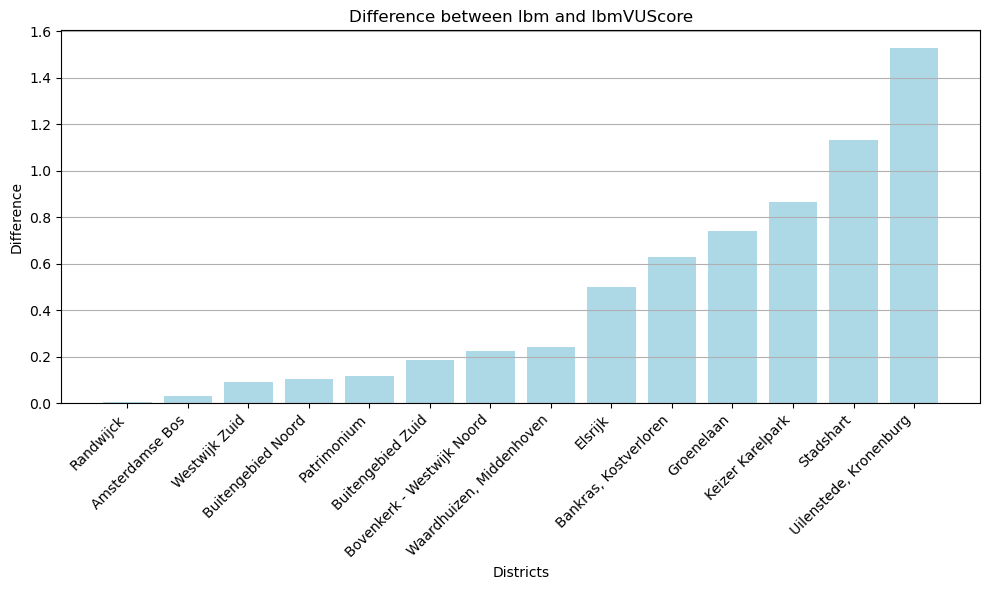

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


df['lbm_difference'] = df.apply(lambda row: row['lbmVUScore'] - row['lbm'] if row['lbm'] <= row['lbmVUScore'] else row['lbm'] - row['lbmVUScore'], axis=1)
df = df.sort_values(by='lbm_difference', ascending=True)

plt.figure(figsize=(10, 6))


index = range(len(df))


plt.bar(index, df['lbm_difference'], color='lightblue')


plt.xticks(index, df['wk_naam'], rotation=45, ha='right')

plt.xlabel('Districts')
plt.ylabel('Difference')
plt.title('Difference between lbm and lbmVUScore')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


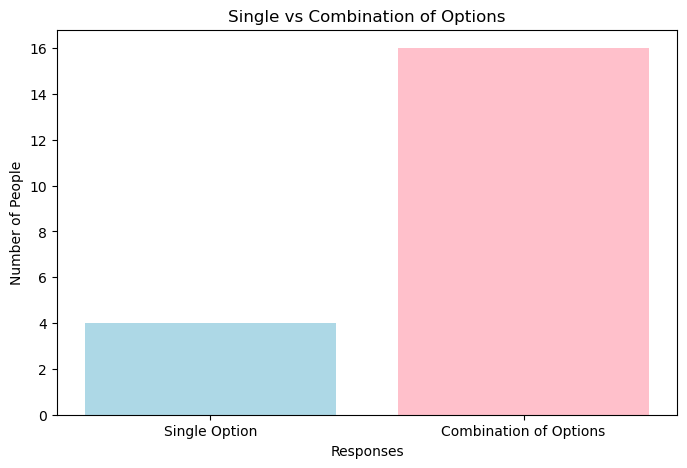

In [2]:
import matplotlib.pyplot as plt

# Data for the bar graph
responses = ['Single Option', 'Combination of Options']
number_of_people = [4, 16]

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(responses, number_of_people, color=['lightblue', 'pink'])
plt.xlabel('Responses')
plt.ylabel('Number of People')
plt.title('Single vs Combination of Options')

# Show the graph
plt.show()
